# Project

**목차**   
  
1. About Dataset  
  * 데이터 선택 사유   
  * 타겟 선정 및 선택 사유   
  * 데이터 로드 및 확인  
  * feature 설명  
    
2. EDA
  * EDA 
   -. 특수문자 -> 영어로 변환하기  
   -. title 정보로 region1 결측치 채우기  
   -. title에서 연도 분리하기   
  * Feature Engineering 
   -. description 분석   
   -. country기준으로 designation Features수 줄이기   
  * 데이터 정규화   
   -. 각 feature 정규화 
  * 노이즈 제거
   -. price feature 이상치 줄이기   
  * 데이터 밸런스(외도, 척도) 확인 
  * Data leakage 확인
  * 유용성 여부 및 한계 피드백 

# 1. About Dataset 

## 1-1) 데이터 선정사유 
  

최근 체결한 RCEP협정은 대한민국이 성공적이다는 평가를 받는다. 이는 대한민국 기업에 상당한 이익과 성장시간을 보장해준 협정이라 평가받는다.  
이러한 시대적 분위기에 편승하여 이번에는 유럽과 미국도 제 2의 RCEP를 체결하고자 대한국민 기재부는 노력중에 있다.  
그중 일환으로 와인에 대한 균일평등화 작업이 진행되고 있으며, 와인의 대중화를 높이고자 다각적인 측면에서 검토가 진행중에 있다.  

와인 담당자는 DS.ltd에 지난 10년간 10만건 이상의 데이터 분석을 통해 와인의 가격에 대한 머신러닝 모델 제작을 요청하였다. 

1. 선정사유(1) : DS.ltd에서는 캐글에 업로드된 wine 데이터 중 8만건 이상되는 데이터로 분석을 진행하고자 한다. 
2. 선정사유(2) : 화학성분이 기재된 wine 데이터도 있었으나, 대중화를 목적으로 둔 본 분석과 이질감이 있다 사료하여 해당 데이터로 선정하였다. 



위와 같은 사유로 DS.ltd에서는 해당 데이터로 와인 가격분석을 진행하고자 합니다.  


---

## 1-2) target 선정사유 

  
우리는 기존에 판매된 와인가격에 대한 분석을 진행해야 하므로 price를 target으로 선정토록 하겠습니다.  
  
또한, price를 기준으로 어떤 와인이 좋다 나쁘다의 분류를 하는 것이 아니며   
적절한 가격은 얼마정도인지 가격 예측을 목표로 하기 때문에 회귀분석으로 접근토록 하겠습니다. 

---

## 1-3) 데이터 로드 및 확인  

In [1]:
import pandas as pd
import numpy as np 
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\project\section2_porject_210222\winemag-data-130k-v2.csv", index_col=0)

In [3]:
df = data

In [4]:
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [5]:
# 데이터량 확인
df.shape

(129971, 13)

In [6]:
# 데이터 결측치 확인 
df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
# df1.info로 확인 결과 대부분 object 데이터 타입임을 확인하였다. 
# check the data info -> This data is almost object types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [8]:
# object data의 unique를 살펴보았다. 
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
taster_twitter_handle,98758,15,@vossroger,25514
region_2,50511,17,Central Coast,11065
taster_name,103727,19,Roger Voss,25514
country,129908,43,US,54504
province,129908,425,California,36247
variety,129970,707,Pinot Noir,13272
region_1,108724,1229,Napa Valley,4480
winery,129971,16757,Wines & Winemakers,222
designation,92506,37979,Reserve,2009
title,129971,118840,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11


## 1-4) feature 설명 
  
'country' - 어느나라에서 생산되었는지  
'description' - 와인 시음 후 와인에 대한 평가 및 설명   
'designation' - 양조장이 있는 포도원   
'points' - 시음 후 와인 점수   
'price' - 와인의 가격 ( "our target" )  
'province' - 와인 제작 시, 사용되는 포도의 출처   
'region_1' - 포도가 자라는 지역 
'region_2' - 포도가 자라는 지역을 상세하게 기재한 feature
'taster_name' - 시음한 사람     
'taster_twitter_handle' 시음한 사람의 트위터   
'title' - 와인명  
'variety' - 와인을 만들때 혼합된 포도  
'winery' - 양조장명  

### **☆ 지금까지 insight ☆**  
 1. designation과 winery를 동일하게 양조장에 대한 정보를 나타내고 있다.  
     -> 확인 후 합칠 수 있는 것들은 혼합할 예정   
       
 2. region_1과 region_2도 동일한 정보를 나타내며, title에 region정보가 있는 것을 확인할 수 있었다.  
    -> 결측치는 이로 대체 예정 
      
 3. taster_name와 taster_twitter_handle도 taster에 대한 동일한 정보를 제공해주고 있다.  
    -> 확인 후 합칠 수 있는 것들은 혼합할 예정 
      
 4. title, variety, winery 등은 결측치가 거의 없다. 이에, 해당 데이터를 활용하여 결측치를 채울 수 있는 것들은 채울 예정
   
 5. description을 split하여 aroma, blend, sweet 등의 단어를 찾아서 타겟과의 연관관계를 확인해보고자 한다    
   
 6. 또한, 너무 unique가 높기 때문에 각 feature별로 count하여 count된 만큼 페센트로 가중치를 주고자 한다.  


### ☆ 나라별 용어 따른 숙성 정도 차이 ☆

7. 스페인, 이탈리아 ( 법적 필수 준수사항 )


 |등급|내용|
 |----|-----|
 |joven|전혀 숙성을 시키지 않고 바로 출시된 와인|
 |crianza|최소 24개월이상 오크 및 병에 담아 숙성 후 출시된 와인|
 |reserva|최소 36개월이상 오크 및 병에 담아 숙성 후 출시된 와인|
 |gran reserva|최소 60개월이상 오크 및 병에 담아 숙성 후 출시된 와인|

8. 그외나라(미국, 칠레, 호주, 뉴질랜드 등)   
 -. 별다른 규정 없이 바로 taster에게 좋은 평가를 받으면 reserva라는 표기 가능   

9. 기타(혼용되는 용어)  
 -. reserva는 나라에 따라서 riserva, reserve 등으로 혼용되어 사용된다고 한다.  
 -. ["À", "A"],["Á", "A"],["Â", "A"],["Ã", "A"],["Ä", "A"],["Ä", "A"],["Å", "A"]  
 -. ,["à", "a"],["á", "a"],["â", "a"],["ã", "a"],["ä", "a"],["ä", "a"],["å", "a"]  
 -. ,["È", "E"],["É", "E"],["Ê", "E"],["Ë", "E"],["Ë", "E"]  
 -. ,["è", "e"],["é", "e"],["ê", "e"],["ë", "e"],["ë", "e"]  
 -. ,["Æ", "AE"],["æ", "ae"],["Ç", "C"],["ç", "c"]  
 -. ,["Ì", "I"],["Í", "I"],["Î", "I"],["Ï", "I"],["Ï", "I"]  
 -. ,["ì", "i"],["í", "i"],["î", "i"],["ï", "i"],["ï", "i"]  
 -. ,["Ð", "D"],["ð", "d"],["Ñ", "N"],["ñ", "n"]  
 -. ,["Ò", "O"],["Ó", "O"],["Ô", "O"],["Õ", "O"],["Ö", "O"],["Ö", "O"],["Œ", "OE"]   
 -. ,["ò", "o"],["ó", "o"],["ô", "o"],["õ", "o"],["ö", "o"],["ö", "o"],["œ", "oe"]  
 -. ,["Ù", "U"],["Ú", "U"],["Û", "U"],["Ü", "U"],["Ü", "U"]  
 -. ,["ù", "u"],["ú", "u"],["û", "u"],["ü", "u"],["ü", "u"]  
 -. ,["Ý", "Y"],["Ÿ", "Y"],["Ÿ", "Y"]  
 -. ,["ý", "y"],["ÿ", "y"],["ÿ", "y"]  
 -. ,["Þ", "P"],["þ", "p"],["ß", "s"]["¡", "!"]["¿", "?"]  
  -> 위 용어를 모두 분석한 결과, 부분적으로만 대문자로 시작되는 글자는 없었으며,    
  -> 제품의 발음을 위해 France 등 일부 유럽국가에서만 특수문자로 기재가 되어 있음을 확인하였다.   
  -> 이에, 카테고리티를 줄이기 위해서 이를 통일하는 작업이 필요하다가 생각된다. 

10. 출처   
 -. 와인등급 :https://www.wine21.com/11_news/news_view.html?Idx=17111  
 -. 와인등급 : https://m.blog.naver.com/interkj87/220699483883  
 -. 와인등급 : https://www.decantalo.com/en/blog/winemaking/classifying-wines-by-their-age-crianza-reserva-gran-reserva/  
 -. 유럽(문자) 표기법:http://help.hancom.com/hoffice/multi/ko_kr/hwp/insert/europe.htm
※ 모든 title에 해당 정보가 기재되어 있음

유럽(외국문자) 표기법
http://help.hancom.com/hoffice/multi/ko_kr/hwp/insert/europe.htm

# 2. EDA


   -. 
   -.   
  * Feature Engineering 
   -. description 분석   
   -. country기준으로 designation Features수 줄이기   

In [9]:
# 혼용되는 용어 통일을 위한 object 추출 
df.select_dtypes(exclude="number").columns

Index(['country', 'description', 'designation', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery'],
      dtype='object')

In [10]:
# 혼용되는 용어 통일을 위한 object 리스트화
object_columns = ['country', 'description', 'designation', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery']

In [11]:
df[object_columns].dtypes

country                  object
description              object
designation              object
province                 object
region_1                 object
region_2                 object
taster_name              object
taster_twitter_handle    object
title                    object
variety                  object
winery                   object
dtype: object

In [12]:
df[~df.isnull()]["variety"]

0            White Blend
1         Portuguese Red
2             Pinot Gris
3               Riesling
4             Pinot Noir
               ...      
129966          Riesling
129967        Pinot Noir
129968    Gewürztraminer
129969        Pinot Gris
129970    Gewürztraminer
Name: variety, Length: 129971, dtype: object

In [13]:
# 위에서도 언급한 바와 같이 같은 용어인데 나라별로 철자를 다르게 사용한다. 
# 이에, 용어를 통일하고자 한다. 

for column in df[~df.isnull()][object_columns]:
    df[column] = df[column].str.replace("reserva","reserve")
    df[column] = df[column].str.replace("riserva","reserve")

In [14]:
# "designation","description" -> 변경된 값이 모두 정상적으로 변경되어 출력되지 않음
df[["designation","description"]].query('description.str.contains("reserva")',engine='python').head(10)

,designation,description


## 2-1) 특수문자 -> 영어로 변환하기

In [15]:
# 문자 영어로 통일 
# 위에서도 언급한 바와 같이 해당 데이터에는 발음의 구분 목적으로 
# 특수문자가 기재되어 있어 해당 데이터를 영어로 변환해주고자 함 

lists = [["À","Á","Â","Ã","Ä","Ä","Å"]
        ,["à","á","â","ã","ä","ä","å"]
        ,["È","É","Ê","Ë","Ë"]
        ,["è", "é", "ê", "ë", "ë"]     
        ,["ç", "c"]
        ,["ì","í","î","ï","ï"]
        ,["ò","ó","ô","õ","ö","ö","œ"]
        ,["ñ"]
        ,["ù","ú","û","ü","ü"]
        ,["ý","ÿ","ÿ"]]

for list in lists[0][1] :
    df = df.replace(list, "a", regex=True)

for list in lists[2][3] :
    df = df.replace(list, "e", regex=True)
    
for list in lists[4] :
    df = df.replace(list, "c", regex=True)
    
for list in lists[5] :
    df = df.replace(list, "i", regex=True)
    
for list in lists[6] :
    df = df.replace(list, "o", regex=True)
    
for list in lists[7] :
     df = df.replace(list, "n", regex=True)
    
for list in lists[8] :
    df = df.replace(list, "u", regex=True)
    
for list in lists[9] :
    df = df.replace(list, "y", regex=True)

In [16]:
# 모든 대문자 -> 소문자
for column in object_columns:
    df[column] = df[column].str.lower()

In [17]:
# 모두 제거 되고, 대문자로 소문자로 변경된 것을 확인 
df.tail(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,germany,notes of honeysuckle and cantaloupe sweeten th...,brauneberger juffer-sonnenuhr spätlese,90,28.0,mosel,NaN,NaN,anna lee c. iijima,NaN,dr. h. thanisch (erben muller-burggraef) 2013 ...,riesling,dr. h. thanisch (erben muller-burggraef)
129967,us,citation is given as much as a decade of bottl...,NaN,90,75.0,oregon,oregon,oregon other,paul gregutt,@paulgwine,citation 2004 pinot noir (oregon),pinot noir,citation
129968,france,well-drained gravel soil gives this wine its c...,kritt,90,30.0,alsace,alsace,NaN,roger voss,@vossroger,domaine gresser 2013 kritt gewurztraminer (als...,gewurztraminer,domaine gresser
129969,france,"a dry style of pinot gris, this is crisp with ...",NaN,90,32.0,alsace,alsace,NaN,roger voss,@vossroger,domaine marcel deiss 2012 pinot gris (alsace),pinot gris,domaine marcel deiss
129970,france,"big, rich and off-dry, this is powered by inte...",lieu-dit harth cuvée caroline,90,21.0,alsace,alsace,NaN,roger voss,@vossroger,domaine schoffit 2012 lieu-dit harth cuvée car...,gewurztraminer,domaine schoffit


## 2-2) title를 통해 region 결측치 해결하기 

In [18]:
# "region_1","title" 관찰 
df[["region_1","title"]].query('title.str.contains("joven")',engine='python').head(10)

,region_1,title
1827,ribeira sacra,adegas moure 2013 tradicion joven red (ribeira...
2138,rioja,bodegas riojanas 2015 canchales vino joven (r...
4570,rioja,covila 2015 adivino tinto joven (rioja)
7705,ribera del duero,pago de los capellanes 2006 joven roble (ribe...
9360,ribera del duero,arroyo 2006 joven (ribera del duero)
9421,la mancha,vinicola de castilla 2011 finca del castillo j...
16034,toro,muruve 2009 joven tinto (toro)
16295,terra alta,finca hispana 2013 joven garnacha blanca (terr...
21151,paso robles,croma vera 2015 joven tempranillo (paso robles)
25668,ribera del duero,pradorey 2011 tinto joven (ribera del duero)


위와 같이 데이터를 살펴본 결과, title의 괄호 부분이 region_1를 나타냄을 알 수 있었다.
이로 region_1의 결측치 21,247개를 처리할 수 있다.

In [19]:
# 먼저 (로 split하고 1번째 인덱스를 region으로 저장 
df['region'] = df.title.str.split('(').str[1]

# 먼저 )로 split하고 1번째 인덱스를 region으로 저장 
df['region'] = df.region.str.split(')').str[0]
df['region']

0                           etna
1                          douro
2              willamette valley
3            lake michigan shore
4              willamette valley
                   ...          
129966    erben muller-burggraef
129967                    oregon
129968                    alsace
129969                    alsace
129970                    alsace
Name: region, Length: 129971, dtype: object

In [20]:
# 데어터 컬럼 생성여부 확인
df.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region
0,italy,"aromas include tropical fruit, broom, brimston...",vulkà bianco,87,NaN,sicily & sardinia,etna,NaN,kerin o’keefe,@kerinokeefe,nicosia 2013 vulkà bianco (etna),white blend,nicosia,etna


In [21]:
df["title"].isnull().sum()

0

In [22]:
print(df['region_1'].isnull().sum())
print(df['region'].isnull().sum())

21247
10522


region_1보다는 결측치를 만개주렸다. title에는 결측치가 없으나, title내에 ()로 지역명이 기재되어 있지 않은 데이터가 1만개 정도 있는 것 같다 

In [23]:
region_count = pd.DataFrame(df["region"].value_counts())
region_count["region"] = region_count["region"]/len(region_count["region"])
region_count.head(2)

,region
napa valley,2.872354
columbia valley,2.692110


In [24]:
df = pd.merge(df, region_count, left_on="region", right_index=True)
df.head(1)

,region,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region_x,region_y
0,etna,italy,"aromas include tropical fruit, broom, brimston...",vulkà bianco,87,NaN,sicily & sardinia,etna,NaN,kerin o’keefe,@kerinokeefe,nicosia 2013 vulkà bianco (etna),white blend,nicosia,etna,0.161642


## 2-3) title에서 연도 분리하기 

In [25]:
# "region_1","title" 관찰 
df[["title"]].query('title.str.contains("joven")',engine='python').head(10)

,title
7705,pago de los capellanes 2006 joven roble (ribe...
9360,arroyo 2006 joven (ribera del duero)
25668,pradorey 2011 tinto joven (ribera del duero)
30062,martin berdugo 2010 joven (ribera del duero)
35254,valderiz 2014 valdehermoso joven (ribera del ...
39973,martin berdugo 2006 joven (ribera del duero)
53838,valderiz 2012 valdehermoso joven (ribera del ...
62697,senorio de sotillo 2012 joven (ribera del duero)
65533,senorio de sotillo 2013 joven (ribera del duero)
72110,costaval 2006 joven (ribera del duero)


title에는 와인 규정상 생성된 연도를 기재하게 되어 있다.  
이 특성을 이용하여 와인의 생성연도를 구해보고자 한다. 

In [26]:
df["title"].isnull().sum()

0

In [27]:
def qwe(row):
    return re.findall("\d+", row)

df['year'] = df['title'].apply(qwe)

In [28]:
# # year feature 생성 
# title_lists = df["title"].tolist()
# for list in title_lists :
#     test = re.findall("\d+", list)

#     for i in test:
#         n = 0 
#         if int(i) > 1990 :
#             df["year"][n, :] = int(i)
#         else :
#             df["year"][n, :] = 0
#         n = n+1

## 2-4) winery에 가중치 부여하기 

In [29]:
df["winery"]

0                             nicosia
13                masseria setteporte
445       fattorie romeo del castello
844                         cottanera
861                             graci
                     ...             
126987                       angeline
129280            château d'auvernier
129331            tenuta sant'antonio
129411                          gorgo
129760                  luigi maffini
Name: winery, Length: 119449, dtype: object

In [30]:
df["winery"].describe()

count                 119449
unique                 15237
top       wines & winemakers
freq                     222
Name: winery, dtype: object

In [31]:
df["winery"].isnull().sum()

0

해당 데이터를 살펴보니 unique는 높으나 결측치가 없는 것을 확인된다.  
이에 해당 데이터를 카테고리별로 카운트하여 총 카운트된 갯수로 나누어준 점수로 구성된  
새로운 feature를 만들어주고자 한다.

위와 같이 처리를 하였을 때 좋은 점은 개별점수가 하나의 개별 unique가 되면서 회귀분석을 진행할 수 있다는 점이다. 

In [32]:
# winery value_count 및 score 생성 
winery_count = pd.DataFrame(df["winery"].value_counts())
winery_count["winery"] = winery_count["winery"]/len(winery_count["winery"])
winery_count.head(2)

,winery
wines & winemakers,0.014570
testarossa,0.014307


In [33]:
# data wrangling을 통한 카테고리데이터 점수화 및 merge
df = pd.merge(df, winery_count, left_on="winery", right_index=True)
df.head(1)

# 카피가 되면서 merge가 되어 추후 필요없는 feature는 일괄적으로 삭제 예정

,winery,region,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery_x,region_x,region_y,year,winery_y
0,nicosia,etna,italy,"aromas include tropical fruit, broom, brimston...",vulkà bianco,87,NaN,sicily & sardinia,etna,NaN,kerin o’keefe,@kerinokeefe,nicosia 2013 vulkà bianco (etna),white blend,nicosia,etna,0.161642,[2013],0.000722


In [34]:
df["winery_y"].isnull().sum()

0

## 2-5) winery에 가중치 부여하기 

In [35]:
df['variety'].value_counts().head(5)

pinot noir            12523
chardonnay            10960
cabernet sauvignon     9446
red blend              8061
riesling               5149
Name: variety, dtype: int64

카테고리티가 너무 높기 때문에 이를 이대로 인코더를 통해 학습을 진행할 경우 문제가 feature가 너무나 많아지게 된다. 이에, 해결하기 위해 아래와 같이 2가지를 고민하였다.

구간별로 그룹을 지어 카테고리별로 분리를 할 것인지
count / len로 각 카테고리별 점수표를 만들어서 가중치를 줄것인지
1번을 선택할 경우, 그룹을 나누는 기준을 선정하는 것이 매우 모호하다
수량으로 기준을 나누자니 아래 variety_point에서 관찰되듯 variety_count가 높다고 무조건 max score가 높은 것도 아니며, 평균이 높은 것도 아니다. 이에, 2번 방법으로 각 카테코리별 점수표를 만들어 가중치를 주고자 한다.

위와 같이 처리를 하였을 때 좋은 점은 개별점수가 하나의 개별 unique가 되면서 회귀분석을 진행할 수 있다는 점이다. 

In [36]:
variety_point = df.groupby(['variety']).points.agg([len, min, max, sum])
variety_point["mean"] = variety_point["sum"]/variety_point["len"]
variety_point.sort_values(by="len", ascending=False).head(5)

,len,min,max,sum,mean
variety,,,,,
pinot noir,12523,80,99,1119087,89.362533
chardonnay,10960,80,100,968606,88.376460
cabernet sauvignon,9446,80,100,837039,88.613064
red blend,8061,80,99,712465,88.384196
riesling,5149,80,98,460608,89.455817


In [37]:
variety_count = pd.DataFrame(df["variety"].value_counts())
variety_count["variety"] = variety_count["variety"]/len(variety_count["variety"])
variety_count.shape # 누락된 값있는지 확인 

(694, 1)

In [38]:
# 생성된 variety_count vs variety unique 비교 
df["variety"].describe()

count         119448
unique           694
top       pinot noir
freq           12523
Name: variety, dtype: object

In [39]:
# variety를 카운트하여 해당 카테고리를 인트로 변환하여 주었다. 
# 추후 scaler를 통하여 해당 값들은 조정해줄 예정이다. 
df = pd.merge(df, variety_count, left_on="variety", right_index=True)
df.head(2)

# 카피가 되면서 merge가 되어 추후 필요없는 feature는 일괄적으로 삭제 예정

,variety,winery,region,country,description,designation,points,price,province,region_1,...,taster_name,taster_twitter_handle,title,variety_x,winery_x,region_x,region_y,year,winery_y,variety_y
0,white blend,nicosia,etna,italy,"aromas include tropical fruit, broom, brimston...",vulkà bianco,87,NaN,sicily & sardinia,etna,...,kerin o’keefe,@kerinokeefe,nicosia 2013 vulkà bianco (etna),white blend,nicosia,etna,0.161642,[2013],0.000722,3.26513
12551,white blend,nicosia,etna,italy,"a delicate floral fragrance of white flower, p...",fondo filara bianco,88,NaN,sicily & sardinia,etna,...,kerin o’keefe,@kerinokeefe,nicosia 2013 fondo filara bianco (etna),white blend,nicosia,etna,0.161642,[2013],0.000722,3.26513


## 2-6) description 확인하기

In [40]:
# description을 구성하는 단어 살펴보기 
df["description"] = df["description"].str.split(" ")
lists = df["description"].tolist()

all_list = []
for list in lists:
    for item in list:
        all_list.append(item)

In [41]:
# 단어가 각각 총 몇번 언급되었는지 확인 
counts = {}
for list in all_list :
    counts[list] = counts.get(list, 0) + 1
    
{k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}

{'and': 323147,
 'the': 202269,
 'a': 165892,
 'of': 160448,
 'with': 111081,
 'this': 104232,
 'is': 87463,
 'in': 58487,
 'to': 50661,
 'wine': 49511,
 'it': 48635,
 'on': 43248,
 'flavors': 39962,
 'that': 32715,
 'aromas': 32380,
 'but': 29244,
 'from': 28781,
 "it's": 28226,
 'fruit': 27271,
 'are': 24063,
 'palate': 23894,
 'drink': 23180,
 'black': 22377,
 'has': 21524,
 'for': 20093,
 'ripe': 18836,
 'by': 18810,
 'finish.': 18325,
 'acidity': 17464,
 'an': 16805,
 'as': 16521,
 'its': 16071,
 'red': 15976,
 'cherry': 15661,
 'tannins': 15492,
 'notes': 14224,
 'flavors.': 13092,
 'finish': 12359,
 'fresh': 11757,
 'rich': 11286,
 'offers': 11063,
 'blend': 10907,
 'spice': 10735,
 'while': 10675,
 'white': 10619,
 'shows': 10411,
 'berry': 10190,
 'through': 9958,
 'acidity.': 9806,
 'wine,': 9723,
 'wine.': 9544,
 'at': 9482,
 'nose': 9461,
 'very': 9416,
 'oak': 9205,
 'plum': 9118,
 'apple': 9004,
 'cabernet': 8915,
 'dry': 8895,
 'sweet': 8880,
 'more': 8869,
 'dark': 8844

위와 같이 description을 분석한 결과, 검색되는 데이터량이 너무 많고 이들 중 wine을 대표할만한 키워드를 찾는다하여도 feature수가 급증하며, 문장으로써 의미를 갖는 것에 대한 가중치를 계산하는 것이 불가능하므로 해당 feature는 분석에서 제외토록 하겠습니다. 

## 2-7) designation 확인하기 - feature groupby 시도

In [42]:
# 최초 unique(37979)에서 특수문자 & 용어통일작업으로  unique(37609)로 감소 ( 감소량 : 370)
df["designation"].describe()

count       91882
unique      37400
top       reserve
freq         1991
Name: designation, dtype: object

위에서 언급한 등급으로 해당 feature를 그룹화해보고자 한다. 

In [43]:
# # 문자를 replace하는데 조금 더 효율적으로 변환하기 위해 공백을 _로 변경
# df["designation"] = df["designation"].str.replace(" ", "_")

# # 결측치가 있는 경우, replace 오류가 발생됨 
# # 이에, ~ 를 통해 결측치 있는 부분은 제외하고 designation을 선택하여 
# # 등급별로 변환하는 작업을 진행함 
# for grade in df.loc[~df["designation"].isnull()]["designation"]:
#     if "joven" in grade:
#         df["designation"] = df["designation"].str.replace(grade, "joven")
#     if "crianza" in grade:
#         df["designation"] = df["designation"].str.replace(grade, "crianza")
#     if "gran_reserve" in grade:
#         df["designation"] = df["designation"].str.replace(grade, "gran_reservA")
#     if "reserve" in grade:
#         df["designation"] = df["designation"].str.replace(grade, "reserve")

위와 같이 처리를 하는 것은 매우 시간이 오래걸리고, unique가 1만개정도 밖에 감소를 하지 않기에 해당방법은 사용하지 않도록 하겠습니다. 담당자가 생각한 것과는 다르게 designation를 모두 그룹화 되지 못하였습니다. 
이에, 각 카테고리별 가중치를 부여하여 해당 문제를 해결하고 합니다. ( 시간이 오래걸려 해당 CODE는 주석처리함 )

In [44]:
designation_count = pd.DataFrame(df["designation"].value_counts())
designation_count["designation"] = designation_count["designation"]/len(designation_count["designation"])
designation_count.head(2)

,designation
reserve,0.053235
estate,0.034866


In [45]:
df = pd.merge(df, designation_count, left_on="designation", right_index=True)
df.head(1)

,designation,variety,winery,region,country,description,designation_x,points,price,province,...,taster_twitter_handle,title,variety_x,winery_x,region_x,region_y,year,winery_y,variety_y,designation_y
0,vulkà bianco,white blend,nicosia,etna,italy,"[aromas, include, tropical, fruit,, broom,, br...",vulkà bianco,87,NaN,sicily & sardinia,...,@kerinokeefe,nicosia 2013 vulkà bianco (etna),white blend,nicosia,etna,0.161642,[2013],0.000722,3.26513,0.000027


In [46]:
province_count = pd.DataFrame(df["province"].value_counts())
province_count["province"] = province_count["province"]/len(province_count["province"])
province_count.head(2)

,province
california,59.881773
washington,14.507389


In [47]:
df = pd.merge(df, province_count, left_on="province", right_index=True)
df.head(1)

,province,designation,variety,winery,region,country,description,designation_x,points,price,...,title,variety_x,winery_x,region_x,region_y,year,winery_y,variety_y,designation_y,province_y
0,sicily & sardinia,vulkà bianco,white blend,nicosia,etna,italy,"[aromas, include, tropical, fruit,, broom,, br...",vulkà bianco,87,NaN,...,nicosia 2013 vulkà bianco (etna),white blend,nicosia,etna,0.161642,[2013],0.000722,3.26513,0.000027,3.630542


In [48]:
country_count = pd.DataFrame(df["country"].value_counts())
country_count["country"] = country_count["country"]/len(country_count["country"])
country_count.head(2)

,country
us,868.404762
france,344.404762


In [49]:
df = pd.merge(df, country_count, left_on="country", right_index=True)
df.head(1)

,country,province,designation,variety,winery,region,country_x,description,designation_x,points,...,variety_x,winery_x,region_x,region_y,year,winery_y,variety_y,designation_y,province_y,country_y
0,italy,sicily & sardinia,vulkà bianco,white blend,nicosia,etna,italy,"[aromas, include, tropical, fruit,, broom,, br...",vulkà bianco,87,...,white blend,nicosia,etna,0.161642,[2013],0.000722,3.26513,0.000027,3.630542,330.214286


In [50]:
df.describe(include='number')

,points,price,region_y,winery_y,variety_y,designation_y,province_y,country_y
count,91882.000000,85587.000000,91882.000000,91882.000000,91882.000000,91882.000000,91882.000000,91882.000000
mean,88.742213,37.566967,0.596230,0.002013,7.046710,0.003016,19.410609,473.070328
std,3.040252,36.477961,0.719731,0.002206,6.168669,0.009734,24.525548,336.399867
min,80.000000,4.000000,0.000641,0.000066,0.001441,0.000027,0.002463,0.023810
25%,87.000000,18.000000,0.087235,0.000525,1.938040,0.000053,2.317734,126.476190
50%,89.000000,28.000000,0.355356,0.001313,5.027378,0.000080,6.800493,344.404762
75%,91.000000,45.000000,0.799230,0.002756,13.610951,0.000321,59.881773,868.404762
max,100.000000,2013.000000,2.872354,0.014570,18.044669,0.053235,59.881773,868.404762


<AxesSubplot:>

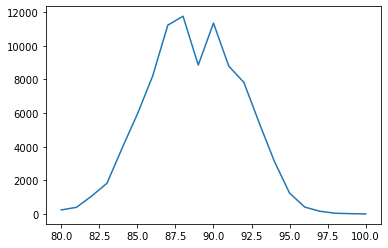

In [51]:
df['points'].value_counts().sort_index().plot.line()

<AxesSubplot:>

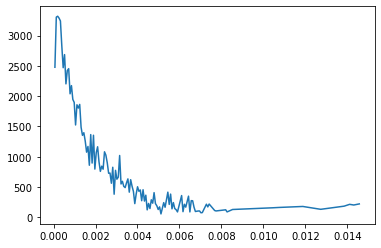

In [52]:
df['winery_y'].value_counts().sort_index().plot.line()

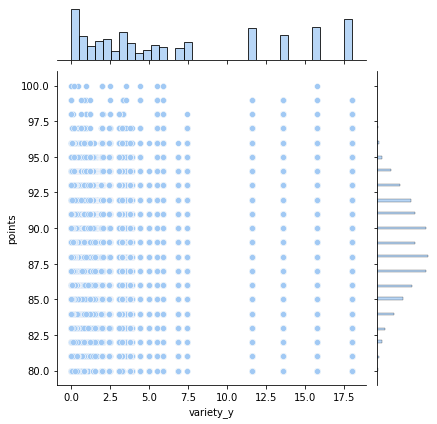

In [53]:
sns.set_palette("pastel")
sns.jointplot(x='variety_y', y='points', data=df)

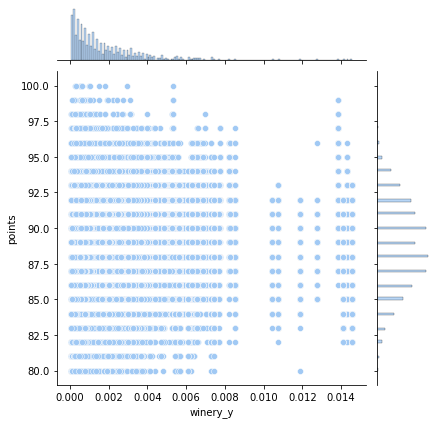

In [54]:
sns.jointplot(x='winery_y', y='points', data=df);

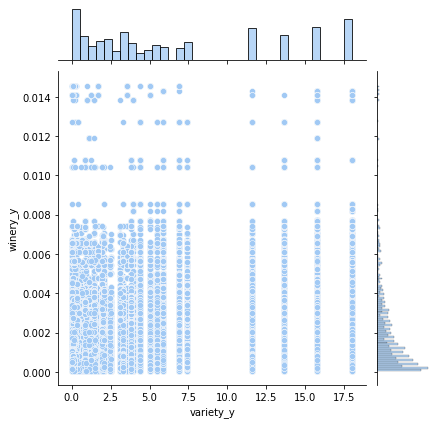

In [55]:
sns.jointplot(y='winery_y', x='variety_y', data=df);

위와 같이 숫자형데이터를 시각화 및 분석하였을 때 해당 feature간의 명확하게 관찰되는 상관관계는 없었다. 모델을 돌리면서 상호간의 인과관계가 있는지 체크해볼 필요가 있을듯 하다.

In [56]:
# 상관관계수 체크!
df.select_dtypes(['int64','float64']).corr()

,points,price,region_y,winery_y,variety_y,designation_y,province_y,country_y
points,1.000000,0.456189,0.062093,0.079727,0.119640,-0.060628,0.092283,0.091134
price,0.456189,1.000000,0.080132,0.007204,0.139044,-0.033228,0.113116,0.096455
region_y,0.062093,0.080132,1.000000,0.132389,0.141022,0.043208,0.348399,0.403023
winery_y,0.079727,0.007204,0.132389,1.000000,0.130927,-0.004131,0.121020,0.126105
variety_y,0.119640,0.139044,0.141022,0.130927,1.000000,0.045578,0.313680,0.329985
designation_y,-0.060628,-0.033228,0.043208,-0.004131,0.045578,1.000000,0.060831,0.063725
province_y,0.092283,0.113116,0.348399,0.121020,0.313680,0.060831,1.000000,0.768206
country_y,0.091134,0.096455,0.403023,0.126105,0.329985,0.063725,0.768206,1.000000


In [57]:
df["price"].describe()

count    85587.000000
mean        37.566967
std         36.477961
min          4.000000
25%         18.000000
50%         28.000000
75%         45.000000
max       2013.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

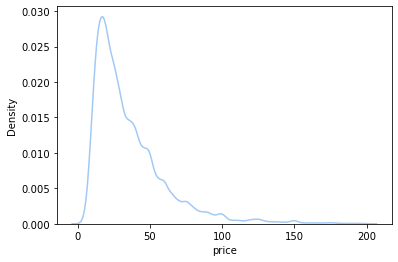

In [58]:
sns.kdeplot(df.query('price < 200').price)

# 2. Create model

## 2-1) LinearRegression

In [59]:
# 필요없는 feature 제거 
df.columns

Index(['country', 'province', 'designation', 'variety', 'winery', 'region',
       'country_x', 'description', 'designation_x', 'points', 'price',
       'province_x', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety_x', 'winery_x', 'region_x',
       'region_y', 'year', 'winery_y', 'variety_y', 'designation_y',
       'province_y', 'country_y'],
      dtype='object')

In [60]:
feature_list = ['points', 'price','winery_y', 'variety_y', 'designation_y', 'province_y',
       'region_y', 'country_y']

target = 'price'
df1 = df[feature_list]
df1 = df1.dropna()

In [61]:
df1.shape

(85587, 8)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder

In [63]:
train, test = train_test_split(df1, train_size=0.80, test_size=0.20, random_state=42)

X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [64]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

**데이터정규화**  
각각의 모델에 동일하게 적용하기 위해서 인코딩 작업을 별도로 진행함

In [65]:
encoder = OneHotEncoder()
scaler = StandardScaler(with_mean=False)
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_val_encoded = encoder.transform(X_val) # 검증데이터
X_val_encoded = scaler.fit_transform(X_val_encoded)

* StandardScaler pipe1 model

In [66]:
pipe1 = make_pipeline(
    StandardScaler(with_mean=False),
    SimpleImputer(), 
    LinearRegression()
   )

In [67]:
pipe1.fit(X_train_encoded, y_train);

* MaxAbsScaler pipe2 model

In [68]:
pipe2 = make_pipeline(

    MaxAbsScaler(),
    SimpleImputer(), 
    LinearRegression()
   )

In [69]:
pipe2.fit(X_train_encoded, y_train);

In [70]:
print(f"훈련 데이터 pipe1 score: {pipe1.score(X_train_encoded, y_train)}")
print(f"검증 데이터 pipe1 score: {pipe1.score(X_val_encoded, y_val)}")

print("---")

print(f"훈련 데이터 pipe2 score: {pipe2.score(X_train_encoded, y_train)}")
print(f"검증 데이터 pipe2 score: {pipe2.score(X_val_encoded, y_val)}")


훈련 데이터 pipe1 score: 0.4215240999422267
검증 데이터 pipe1 score: 0.41089899196662083
---
훈련 데이터 pipe2 score: 0.4215240999391088
검증 데이터 pipe2 score: 0.41379413976320767


#### 위 스코어를 베이스라인 및 베이스모델로 사용
  -. 본 분석은 회귀 분석으로 가장 단순한 선형모델의 점수를 베이스라인을 정하는 것이 타당하다 사료됨 ( 그 외 고성능을 가진 모델을 베이스라인을 잡는 것은 좋은 모델이 가져다주는 이점이 스코어에 반영되기 때문에 기준으로 잡는 것은 무리가 있음 )

## 2-1-1) 이상치 제거(밸런스 조정) 
 -. 데이터가 너무 좋지 않게 나와서 이상치를 일괄적으로 제거하고자 함 

In [71]:
def std_based_outlier(df):
    for i in range(0, len(df.iloc[1])):
        df.iloc[:,i] = df.iloc[:,i].replace(0, np.NaN)
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))].fillna(0)
    return(df)

In [72]:
df1 = std_based_outlier(df1)

## 2-2) RandomForest & gridSearch

In [73]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param = { 
    #50 ~ 100으로 실행했을 때 최적이 100옴
    # 범위 변경 : (50~100) -> (50~500)
    'n_estimators': randint(50, 500), 
    # 과적합을 방지하기 위해 max를 20으로 설정함 
    'max_depth': [5, 10, 15, 20, None], 
    # 최대 선택할 특성 수
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param, 
    n_iter=5, # 데이터의 훈련횟수
    cv=3, # 교차검증 횟수
    # mae은 에러 측정용으로써 낮을 수록 좋은데
    # sklearn은 값이 클수록 좋다고 평가를 하기에 neg를 붙혀서 scoring으로 사용 
    scoring='neg_mean_absolute_error', 
    verbose=10, # 실행 과정 출력 여부
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)


search.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:    7.7s remaining:   50.5s
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   13.1s remaining:   36.3s
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   13.2s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   18.1s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:   18.8s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   19.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   20.5s finished


In [74]:
print('최적 하이퍼파라미터: ', search.best_params_)
print('CV MAE: ', -search.best_score_)
model = search.best_estimator_

최적 하이퍼파라미터:  {'max_depth': None, 'max_features': 0.6011150117432088, 'n_estimators': 201}
CV MAE:  11.895131999001746


In [75]:
model.fit(X_train, y_train);

In [76]:
print(f"최적 모델 훈련 스코어 : {model.score(X_train, y_train)}")
print(f"최적 모델 테스트 스코어 : {model.score(X_test, y_test)}")

최적 모델 훈련 스코어 : 0.9090512854950898
최적 모델 테스트 스코어 : 0.47743331373021314


**이상치 제거전 검증결과들**  
1회차  
param_distributions = { 
    'bootstrap': [True],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
    'max_depth': [10, 15, 20, None], 
    'max_features': ['auto', 'sqrt'], 
    'min_samples_leaf': [2, 4, 6],
    'min_samples_split': [2, 5, 10]
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=8282), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=8282
)  
0.5923866823401831  
0.4410572771628445

2회차   
param_distributions = { 
    'bootstrap': [True],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
    'max_depth': [5, 10, 15, None], 
    'max_features': ['auto', 'sqrt'], 
    'min_samples_leaf': [4, 8, 12],
    'min_samples_split': [4, 8, 12]
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=8282), 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=8282
)    
0.5621359490859237    
0.42881779691323074    

## 2-3) XGboost 

In [77]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier

boosting = XGBRegressor(
    n_estimators=5000,
    objective='reg:squarederror', # default
    learning_rate=0.01,
    max_depth=10,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=1000
         )

[0]	validation_0-rmse:51.58614	validation_1-rmse:53.54825
[1]	validation_0-rmse:51.22690	validation_1-rmse:53.20548
[2]	validation_0-rmse:50.87221	validation_1-rmse:52.86734
[3]	validation_0-rmse:50.52223	validation_1-rmse:52.53344
[4]	validation_0-rmse:50.17604	validation_1-rmse:52.20446
[5]	validation_0-rmse:49.83467	validation_1-rmse:51.87967
[6]	validation_0-rmse:49.49661	validation_1-rmse:51.55956
[7]	validation_0-rmse:49.16361	validation_1-rmse:51.24410
[8]	validation_0-rmse:48.83416	validation_1-rmse:50.93273
[9]	validation_0-rmse:48.50909	validation_1-rmse:50.62584
[10]	validation_0-rmse:48.18771	validation_1-rmse:50.32251
[11]	validation_0-rmse:47.87062	validation_1-rmse:50.02364
[12]	validation_0-rmse:47.55716	validation_1-rmse:49.73047
[13]	validation_0-rmse:47.24804	validation_1-rmse:49.43989
[14]	validation_0-rmse:46.94224	validation_1-rmse:49.15323
[15]	validation_0-rmse:46.64033	validation_1-rmse:48.87117
[16]	validation_0-rmse:46.34256	validation_1-rmse:48.59240
[17]	va

[139]	validation_0-rmse:28.20311	validation_1-rmse:32.22639
[140]	validation_0-rmse:28.14427	validation_1-rmse:32.16861
[141]	validation_0-rmse:28.08586	validation_1-rmse:32.12127
[142]	validation_0-rmse:28.02815	validation_1-rmse:32.06868
[143]	validation_0-rmse:27.97288	validation_1-rmse:32.02368
[144]	validation_0-rmse:27.91662	validation_1-rmse:31.96964
[145]	validation_0-rmse:27.86316	validation_1-rmse:31.92428
[146]	validation_0-rmse:27.80568	validation_1-rmse:31.88677
[147]	validation_0-rmse:27.75135	validation_1-rmse:31.83479
[148]	validation_0-rmse:27.69964	validation_1-rmse:31.79183
[149]	validation_0-rmse:27.64676	validation_1-rmse:31.74108
[150]	validation_0-rmse:27.59452	validation_1-rmse:31.69212
[151]	validation_0-rmse:27.54170	validation_1-rmse:31.65140
[152]	validation_0-rmse:27.49084	validation_1-rmse:31.60429
[153]	validation_0-rmse:27.43908	validation_1-rmse:31.57229
[154]	validation_0-rmse:27.38959	validation_1-rmse:31.54115
[155]	validation_0-rmse:27.34064	validat

[276]	validation_0-rmse:23.67305	validation_1-rmse:28.72475
[277]	validation_0-rmse:23.65907	validation_1-rmse:28.71614
[278]	validation_0-rmse:23.63111	validation_1-rmse:28.69673
[279]	validation_0-rmse:23.61535	validation_1-rmse:28.69053
[280]	validation_0-rmse:23.58929	validation_1-rmse:28.67343
[281]	validation_0-rmse:23.55924	validation_1-rmse:28.65425
[282]	validation_0-rmse:23.54152	validation_1-rmse:28.64735
[283]	validation_0-rmse:23.52578	validation_1-rmse:28.63959
[284]	validation_0-rmse:23.50681	validation_1-rmse:28.62319
[285]	validation_0-rmse:23.49231	validation_1-rmse:28.61698
[286]	validation_0-rmse:23.47386	validation_1-rmse:28.60185
[287]	validation_0-rmse:23.46012	validation_1-rmse:28.59318
[288]	validation_0-rmse:23.43591	validation_1-rmse:28.57671
[289]	validation_0-rmse:23.41909	validation_1-rmse:28.57052
[290]	validation_0-rmse:23.39966	validation_1-rmse:28.55683
[291]	validation_0-rmse:23.38497	validation_1-rmse:28.55119
[292]	validation_0-rmse:23.36849	validat

[413]	validation_0-rmse:21.82538	validation_1-rmse:27.80122
[414]	validation_0-rmse:21.81586	validation_1-rmse:27.79644
[415]	validation_0-rmse:21.79832	validation_1-rmse:27.78925
[416]	validation_0-rmse:21.78814	validation_1-rmse:27.78544
[417]	validation_0-rmse:21.77563	validation_1-rmse:27.78212
[418]	validation_0-rmse:21.76791	validation_1-rmse:27.78082
[419]	validation_0-rmse:21.75969	validation_1-rmse:27.77825
[420]	validation_0-rmse:21.75088	validation_1-rmse:27.77508
[421]	validation_0-rmse:21.74215	validation_1-rmse:27.77235
[422]	validation_0-rmse:21.73501	validation_1-rmse:27.77156
[423]	validation_0-rmse:21.72744	validation_1-rmse:27.76706
[424]	validation_0-rmse:21.72039	validation_1-rmse:27.76663
[425]	validation_0-rmse:21.71581	validation_1-rmse:27.76522
[426]	validation_0-rmse:21.70493	validation_1-rmse:27.76221
[427]	validation_0-rmse:21.69681	validation_1-rmse:27.75987
[428]	validation_0-rmse:21.68723	validation_1-rmse:27.75580
[429]	validation_0-rmse:21.67781	validat

[550]	validation_0-rmse:20.78759	validation_1-rmse:27.48146
[551]	validation_0-rmse:20.78244	validation_1-rmse:27.47964
[552]	validation_0-rmse:20.77993	validation_1-rmse:27.47864
[553]	validation_0-rmse:20.77607	validation_1-rmse:27.47611
[554]	validation_0-rmse:20.77052	validation_1-rmse:27.47530
[555]	validation_0-rmse:20.76214	validation_1-rmse:27.47451
[556]	validation_0-rmse:20.75823	validation_1-rmse:27.47386
[557]	validation_0-rmse:20.75282	validation_1-rmse:27.47224
[558]	validation_0-rmse:20.74711	validation_1-rmse:27.47016
[559]	validation_0-rmse:20.74106	validation_1-rmse:27.46869
[560]	validation_0-rmse:20.73368	validation_1-rmse:27.46626
[561]	validation_0-rmse:20.73045	validation_1-rmse:27.46525
[562]	validation_0-rmse:20.72252	validation_1-rmse:27.46381
[563]	validation_0-rmse:20.71703	validation_1-rmse:27.46370
[564]	validation_0-rmse:20.71215	validation_1-rmse:27.46317
[565]	validation_0-rmse:20.70449	validation_1-rmse:27.46102
[566]	validation_0-rmse:20.70112	validat

[687]	validation_0-rmse:20.19449	validation_1-rmse:27.33050
[688]	validation_0-rmse:20.19287	validation_1-rmse:27.32980
[689]	validation_0-rmse:20.18881	validation_1-rmse:27.32791
[690]	validation_0-rmse:20.18605	validation_1-rmse:27.32582
[691]	validation_0-rmse:20.18332	validation_1-rmse:27.32680
[692]	validation_0-rmse:20.17860	validation_1-rmse:27.32473
[693]	validation_0-rmse:20.17414	validation_1-rmse:27.32280
[694]	validation_0-rmse:20.16999	validation_1-rmse:27.32149
[695]	validation_0-rmse:20.16752	validation_1-rmse:27.32053
[696]	validation_0-rmse:20.15382	validation_1-rmse:27.31995
[697]	validation_0-rmse:20.15173	validation_1-rmse:27.32052
[698]	validation_0-rmse:20.14790	validation_1-rmse:27.31942
[699]	validation_0-rmse:20.14199	validation_1-rmse:27.31882
[700]	validation_0-rmse:20.13696	validation_1-rmse:27.31624
[701]	validation_0-rmse:20.13350	validation_1-rmse:27.31584
[702]	validation_0-rmse:20.13172	validation_1-rmse:27.31503
[703]	validation_0-rmse:20.12959	validat

[824]	validation_0-rmse:19.64694	validation_1-rmse:27.19916
[825]	validation_0-rmse:19.64221	validation_1-rmse:27.19877
[826]	validation_0-rmse:19.64001	validation_1-rmse:27.19810
[827]	validation_0-rmse:19.63837	validation_1-rmse:27.19760
[828]	validation_0-rmse:19.63592	validation_1-rmse:27.19675
[829]	validation_0-rmse:19.63161	validation_1-rmse:27.19464
[830]	validation_0-rmse:19.62798	validation_1-rmse:27.19325
[831]	validation_0-rmse:19.62474	validation_1-rmse:27.19304
[832]	validation_0-rmse:19.62168	validation_1-rmse:27.19231
[833]	validation_0-rmse:19.61874	validation_1-rmse:27.19116
[834]	validation_0-rmse:19.61615	validation_1-rmse:27.19050
[835]	validation_0-rmse:19.61415	validation_1-rmse:27.19153
[836]	validation_0-rmse:19.61157	validation_1-rmse:27.19124
[837]	validation_0-rmse:19.61001	validation_1-rmse:27.19033
[838]	validation_0-rmse:19.60832	validation_1-rmse:27.18970
[839]	validation_0-rmse:19.59488	validation_1-rmse:27.18785
[840]	validation_0-rmse:19.58968	validat

[961]	validation_0-rmse:19.23606	validation_1-rmse:27.10362
[962]	validation_0-rmse:19.23327	validation_1-rmse:27.10367
[963]	validation_0-rmse:19.22867	validation_1-rmse:27.10305
[964]	validation_0-rmse:19.22593	validation_1-rmse:27.10255
[965]	validation_0-rmse:19.22312	validation_1-rmse:27.10186
[966]	validation_0-rmse:19.22166	validation_1-rmse:27.10057
[967]	validation_0-rmse:19.21966	validation_1-rmse:27.09896
[968]	validation_0-rmse:19.21767	validation_1-rmse:27.09856
[969]	validation_0-rmse:19.21667	validation_1-rmse:27.09821
[970]	validation_0-rmse:19.21468	validation_1-rmse:27.09694
[971]	validation_0-rmse:19.21233	validation_1-rmse:27.09545
[972]	validation_0-rmse:19.21047	validation_1-rmse:27.09479
[973]	validation_0-rmse:19.20468	validation_1-rmse:27.09429
[974]	validation_0-rmse:19.20207	validation_1-rmse:27.09288
[975]	validation_0-rmse:19.20030	validation_1-rmse:27.09255
[976]	validation_0-rmse:19.19881	validation_1-rmse:27.09141
[977]	validation_0-rmse:19.19739	validat

[1096]	validation_0-rmse:18.92148	validation_1-rmse:27.01037
[1097]	validation_0-rmse:18.91947	validation_1-rmse:27.00899
[1098]	validation_0-rmse:18.91802	validation_1-rmse:27.00857
[1099]	validation_0-rmse:18.91688	validation_1-rmse:27.00947
[1100]	validation_0-rmse:18.91467	validation_1-rmse:27.00902
[1101]	validation_0-rmse:18.91327	validation_1-rmse:27.00839
[1102]	validation_0-rmse:18.91225	validation_1-rmse:27.00787
[1103]	validation_0-rmse:18.91068	validation_1-rmse:27.00710
[1104]	validation_0-rmse:18.90974	validation_1-rmse:27.00689
[1105]	validation_0-rmse:18.90873	validation_1-rmse:27.00642
[1106]	validation_0-rmse:18.90685	validation_1-rmse:27.00606
[1107]	validation_0-rmse:18.90567	validation_1-rmse:27.00689
[1108]	validation_0-rmse:18.90346	validation_1-rmse:27.00634
[1109]	validation_0-rmse:18.90179	validation_1-rmse:27.00429
[1110]	validation_0-rmse:18.89992	validation_1-rmse:27.00323
[1111]	validation_0-rmse:18.89871	validation_1-rmse:27.00427
[1112]	validation_0-rmse

[1231]	validation_0-rmse:18.67015	validation_1-rmse:26.93109
[1232]	validation_0-rmse:18.66792	validation_1-rmse:26.93086
[1233]	validation_0-rmse:18.66730	validation_1-rmse:26.93062
[1234]	validation_0-rmse:18.66600	validation_1-rmse:26.93019
[1235]	validation_0-rmse:18.66282	validation_1-rmse:26.92932
[1236]	validation_0-rmse:18.66155	validation_1-rmse:26.92878
[1237]	validation_0-rmse:18.65979	validation_1-rmse:26.92880
[1238]	validation_0-rmse:18.65876	validation_1-rmse:26.92836
[1239]	validation_0-rmse:18.65793	validation_1-rmse:26.92936
[1240]	validation_0-rmse:18.65675	validation_1-rmse:26.92945
[1241]	validation_0-rmse:18.65555	validation_1-rmse:26.92933
[1242]	validation_0-rmse:18.65219	validation_1-rmse:26.92883
[1243]	validation_0-rmse:18.64948	validation_1-rmse:26.92723
[1244]	validation_0-rmse:18.64623	validation_1-rmse:26.92698
[1245]	validation_0-rmse:18.64420	validation_1-rmse:26.92626
[1246]	validation_0-rmse:18.64253	validation_1-rmse:26.92580
[1247]	validation_0-rmse

[1366]	validation_0-rmse:18.41456	validation_1-rmse:26.85368
[1367]	validation_0-rmse:18.41189	validation_1-rmse:26.85366
[1368]	validation_0-rmse:18.41011	validation_1-rmse:26.85219
[1369]	validation_0-rmse:18.40820	validation_1-rmse:26.85165
[1370]	validation_0-rmse:18.40714	validation_1-rmse:26.85102
[1371]	validation_0-rmse:18.40566	validation_1-rmse:26.84933
[1372]	validation_0-rmse:18.40415	validation_1-rmse:26.84869
[1373]	validation_0-rmse:18.40198	validation_1-rmse:26.84797
[1374]	validation_0-rmse:18.40026	validation_1-rmse:26.84719
[1375]	validation_0-rmse:18.39914	validation_1-rmse:26.84674
[1376]	validation_0-rmse:18.39695	validation_1-rmse:26.84586
[1377]	validation_0-rmse:18.39547	validation_1-rmse:26.84489
[1378]	validation_0-rmse:18.39347	validation_1-rmse:26.84452
[1379]	validation_0-rmse:18.39255	validation_1-rmse:26.84428
[1380]	validation_0-rmse:18.39054	validation_1-rmse:26.84395
[1381]	validation_0-rmse:18.38859	validation_1-rmse:26.84292
[1382]	validation_0-rmse

[1501]	validation_0-rmse:18.17211	validation_1-rmse:26.78380
[1502]	validation_0-rmse:18.17102	validation_1-rmse:26.78355
[1503]	validation_0-rmse:18.16989	validation_1-rmse:26.78305
[1504]	validation_0-rmse:18.15889	validation_1-rmse:26.78192
[1505]	validation_0-rmse:18.15732	validation_1-rmse:26.78119
[1506]	validation_0-rmse:18.15623	validation_1-rmse:26.78056
[1507]	validation_0-rmse:18.15479	validation_1-rmse:26.78022
[1508]	validation_0-rmse:18.15352	validation_1-rmse:26.78004
[1509]	validation_0-rmse:18.15226	validation_1-rmse:26.77929
[1510]	validation_0-rmse:18.15073	validation_1-rmse:26.77866
[1511]	validation_0-rmse:18.14966	validation_1-rmse:26.77817
[1512]	validation_0-rmse:18.14876	validation_1-rmse:26.77777
[1513]	validation_0-rmse:18.14692	validation_1-rmse:26.77767
[1514]	validation_0-rmse:18.14559	validation_1-rmse:26.77693
[1515]	validation_0-rmse:18.14416	validation_1-rmse:26.77622
[1516]	validation_0-rmse:18.14347	validation_1-rmse:26.77589
[1517]	validation_0-rmse

[1636]	validation_0-rmse:17.97001	validation_1-rmse:26.72341
[1637]	validation_0-rmse:17.96775	validation_1-rmse:26.72248
[1638]	validation_0-rmse:17.96681	validation_1-rmse:26.72222
[1639]	validation_0-rmse:17.96457	validation_1-rmse:26.72262
[1640]	validation_0-rmse:17.96340	validation_1-rmse:26.72227
[1641]	validation_0-rmse:17.96234	validation_1-rmse:26.72177
[1642]	validation_0-rmse:17.95275	validation_1-rmse:26.72146
[1643]	validation_0-rmse:17.95127	validation_1-rmse:26.72075
[1644]	validation_0-rmse:17.94951	validation_1-rmse:26.72077
[1645]	validation_0-rmse:17.94838	validation_1-rmse:26.72081
[1646]	validation_0-rmse:17.94736	validation_1-rmse:26.72077
[1647]	validation_0-rmse:17.94651	validation_1-rmse:26.72037
[1648]	validation_0-rmse:17.94607	validation_1-rmse:26.72024
[1649]	validation_0-rmse:17.94486	validation_1-rmse:26.71985
[1650]	validation_0-rmse:17.94382	validation_1-rmse:26.71941
[1651]	validation_0-rmse:17.94282	validation_1-rmse:26.71893
[1652]	validation_0-rmse

[1771]	validation_0-rmse:17.77045	validation_1-rmse:26.67340
[1772]	validation_0-rmse:17.76949	validation_1-rmse:26.67302
[1773]	validation_0-rmse:17.76879	validation_1-rmse:26.67268
[1774]	validation_0-rmse:17.76640	validation_1-rmse:26.67258
[1775]	validation_0-rmse:17.76539	validation_1-rmse:26.67228
[1776]	validation_0-rmse:17.76467	validation_1-rmse:26.67193
[1777]	validation_0-rmse:17.76311	validation_1-rmse:26.67153
[1778]	validation_0-rmse:17.76247	validation_1-rmse:26.67125
[1779]	validation_0-rmse:17.76041	validation_1-rmse:26.67078
[1780]	validation_0-rmse:17.75991	validation_1-rmse:26.67067
[1781]	validation_0-rmse:17.75811	validation_1-rmse:26.66977
[1782]	validation_0-rmse:17.75642	validation_1-rmse:26.66956
[1783]	validation_0-rmse:17.75571	validation_1-rmse:26.66933
[1784]	validation_0-rmse:17.75444	validation_1-rmse:26.66863
[1785]	validation_0-rmse:17.75236	validation_1-rmse:26.66899
[1786]	validation_0-rmse:17.75173	validation_1-rmse:26.66874
[1787]	validation_0-rmse

[1906]	validation_0-rmse:17.58864	validation_1-rmse:26.62849
[1907]	validation_0-rmse:17.58807	validation_1-rmse:26.62832
[1908]	validation_0-rmse:17.58663	validation_1-rmse:26.62818
[1909]	validation_0-rmse:17.58595	validation_1-rmse:26.62809
[1910]	validation_0-rmse:17.58271	validation_1-rmse:26.62800
[1911]	validation_0-rmse:17.58195	validation_1-rmse:26.62784
[1912]	validation_0-rmse:17.58064	validation_1-rmse:26.62713
[1913]	validation_0-rmse:17.57967	validation_1-rmse:26.62703
[1914]	validation_0-rmse:17.57911	validation_1-rmse:26.62692
[1915]	validation_0-rmse:17.57781	validation_1-rmse:26.62642
[1916]	validation_0-rmse:17.57417	validation_1-rmse:26.62643
[1917]	validation_0-rmse:17.57354	validation_1-rmse:26.62651
[1918]	validation_0-rmse:17.57245	validation_1-rmse:26.62598
[1919]	validation_0-rmse:17.57168	validation_1-rmse:26.62565
[1920]	validation_0-rmse:17.56969	validation_1-rmse:26.62521
[1921]	validation_0-rmse:17.56919	validation_1-rmse:26.62512
[1922]	validation_0-rmse

[2041]	validation_0-rmse:17.40729	validation_1-rmse:26.59626
[2042]	validation_0-rmse:17.40668	validation_1-rmse:26.59613
[2043]	validation_0-rmse:17.40611	validation_1-rmse:26.59589
[2044]	validation_0-rmse:17.40518	validation_1-rmse:26.59556
[2045]	validation_0-rmse:17.40179	validation_1-rmse:26.59599
[2046]	validation_0-rmse:17.40118	validation_1-rmse:26.59556
[2047]	validation_0-rmse:17.40004	validation_1-rmse:26.59525
[2048]	validation_0-rmse:17.39897	validation_1-rmse:26.59502
[2049]	validation_0-rmse:17.39833	validation_1-rmse:26.59474
[2050]	validation_0-rmse:17.39697	validation_1-rmse:26.59386
[2051]	validation_0-rmse:17.39622	validation_1-rmse:26.59344
[2052]	validation_0-rmse:17.39538	validation_1-rmse:26.59347
[2053]	validation_0-rmse:17.39466	validation_1-rmse:26.59335
[2054]	validation_0-rmse:17.39258	validation_1-rmse:26.59269
[2055]	validation_0-rmse:17.39191	validation_1-rmse:26.59261
[2056]	validation_0-rmse:17.39124	validation_1-rmse:26.59237
[2057]	validation_0-rmse

[2176]	validation_0-rmse:17.25373	validation_1-rmse:26.56416
[2177]	validation_0-rmse:17.25268	validation_1-rmse:26.56388
[2178]	validation_0-rmse:17.25198	validation_1-rmse:26.56362
[2179]	validation_0-rmse:17.25108	validation_1-rmse:26.56345
[2180]	validation_0-rmse:17.24846	validation_1-rmse:26.56285
[2181]	validation_0-rmse:17.24794	validation_1-rmse:26.56272
[2182]	validation_0-rmse:17.24613	validation_1-rmse:26.56262
[2183]	validation_0-rmse:17.24454	validation_1-rmse:26.56245
[2184]	validation_0-rmse:17.24386	validation_1-rmse:26.56226
[2185]	validation_0-rmse:17.24333	validation_1-rmse:26.56197
[2186]	validation_0-rmse:17.24200	validation_1-rmse:26.56140
[2187]	validation_0-rmse:17.24101	validation_1-rmse:26.56110
[2188]	validation_0-rmse:17.24043	validation_1-rmse:26.56098
[2189]	validation_0-rmse:17.24002	validation_1-rmse:26.56080
[2190]	validation_0-rmse:17.23916	validation_1-rmse:26.56056
[2191]	validation_0-rmse:17.23851	validation_1-rmse:26.56033
[2192]	validation_0-rmse

[2311]	validation_0-rmse:17.06906	validation_1-rmse:26.52789
[2312]	validation_0-rmse:17.06836	validation_1-rmse:26.52773
[2313]	validation_0-rmse:17.06784	validation_1-rmse:26.52750
[2314]	validation_0-rmse:17.06706	validation_1-rmse:26.52715
[2315]	validation_0-rmse:17.06589	validation_1-rmse:26.52699
[2316]	validation_0-rmse:17.06453	validation_1-rmse:26.52593
[2317]	validation_0-rmse:17.06384	validation_1-rmse:26.52562
[2318]	validation_0-rmse:17.05458	validation_1-rmse:26.52523
[2319]	validation_0-rmse:17.05364	validation_1-rmse:26.52498
[2320]	validation_0-rmse:17.05288	validation_1-rmse:26.52475
[2321]	validation_0-rmse:17.05226	validation_1-rmse:26.52459
[2322]	validation_0-rmse:17.05169	validation_1-rmse:26.52435
[2323]	validation_0-rmse:17.05066	validation_1-rmse:26.52422
[2324]	validation_0-rmse:17.05016	validation_1-rmse:26.52403
[2325]	validation_0-rmse:17.04973	validation_1-rmse:26.52391
[2326]	validation_0-rmse:17.04899	validation_1-rmse:26.52368
[2327]	validation_0-rmse

[2446]	validation_0-rmse:16.93291	validation_1-rmse:26.50272
[2447]	validation_0-rmse:16.93207	validation_1-rmse:26.50164
[2448]	validation_0-rmse:16.93022	validation_1-rmse:26.50124
[2449]	validation_0-rmse:16.92996	validation_1-rmse:26.50113
[2450]	validation_0-rmse:16.92926	validation_1-rmse:26.50061
[2451]	validation_0-rmse:16.92858	validation_1-rmse:26.50036
[2452]	validation_0-rmse:16.92777	validation_1-rmse:26.50026
[2453]	validation_0-rmse:16.92643	validation_1-rmse:26.49948
[2454]	validation_0-rmse:16.92591	validation_1-rmse:26.49933
[2455]	validation_0-rmse:16.92541	validation_1-rmse:26.49917
[2456]	validation_0-rmse:16.92428	validation_1-rmse:26.49816
[2457]	validation_0-rmse:16.92399	validation_1-rmse:26.49809
[2458]	validation_0-rmse:16.92342	validation_1-rmse:26.49817
[2459]	validation_0-rmse:16.92222	validation_1-rmse:26.49771
[2460]	validation_0-rmse:16.92116	validation_1-rmse:26.49783
[2461]	validation_0-rmse:16.92045	validation_1-rmse:26.49777
[2462]	validation_0-rmse

[2581]	validation_0-rmse:16.79973	validation_1-rmse:26.48001
[2582]	validation_0-rmse:16.79912	validation_1-rmse:26.47979
[2583]	validation_0-rmse:16.79793	validation_1-rmse:26.48033
[2584]	validation_0-rmse:16.79641	validation_1-rmse:26.47994
[2585]	validation_0-rmse:16.79561	validation_1-rmse:26.47982
[2586]	validation_0-rmse:16.79487	validation_1-rmse:26.47916
[2587]	validation_0-rmse:16.79342	validation_1-rmse:26.47916
[2588]	validation_0-rmse:16.79292	validation_1-rmse:26.47874
[2589]	validation_0-rmse:16.79188	validation_1-rmse:26.47870
[2590]	validation_0-rmse:16.79137	validation_1-rmse:26.47850
[2591]	validation_0-rmse:16.79056	validation_1-rmse:26.47828
[2592]	validation_0-rmse:16.78944	validation_1-rmse:26.47808
[2593]	validation_0-rmse:16.78904	validation_1-rmse:26.47796
[2594]	validation_0-rmse:16.78836	validation_1-rmse:26.47773
[2595]	validation_0-rmse:16.78692	validation_1-rmse:26.47724
[2596]	validation_0-rmse:16.78627	validation_1-rmse:26.47716
[2597]	validation_0-rmse

[2716]	validation_0-rmse:16.67681	validation_1-rmse:26.45421
[2717]	validation_0-rmse:16.67650	validation_1-rmse:26.45420
[2718]	validation_0-rmse:16.67502	validation_1-rmse:26.45362
[2719]	validation_0-rmse:16.67467	validation_1-rmse:26.45358
[2720]	validation_0-rmse:16.67367	validation_1-rmse:26.45338
[2721]	validation_0-rmse:16.67314	validation_1-rmse:26.45336
[2722]	validation_0-rmse:16.67266	validation_1-rmse:26.45327
[2723]	validation_0-rmse:16.67138	validation_1-rmse:26.45285
[2724]	validation_0-rmse:16.67089	validation_1-rmse:26.45270
[2725]	validation_0-rmse:16.67044	validation_1-rmse:26.45250
[2726]	validation_0-rmse:16.66904	validation_1-rmse:26.45227
[2727]	validation_0-rmse:16.66808	validation_1-rmse:26.45217
[2728]	validation_0-rmse:16.66608	validation_1-rmse:26.45233
[2729]	validation_0-rmse:16.66513	validation_1-rmse:26.45210
[2730]	validation_0-rmse:16.66448	validation_1-rmse:26.45178
[2731]	validation_0-rmse:16.66410	validation_1-rmse:26.45172
[2732]	validation_0-rmse

[2851]	validation_0-rmse:16.55728	validation_1-rmse:26.43031
[2852]	validation_0-rmse:16.55677	validation_1-rmse:26.43018
[2853]	validation_0-rmse:16.55640	validation_1-rmse:26.43017
[2854]	validation_0-rmse:16.55568	validation_1-rmse:26.43015
[2855]	validation_0-rmse:16.55507	validation_1-rmse:26.43018
[2856]	validation_0-rmse:16.55469	validation_1-rmse:26.42999
[2857]	validation_0-rmse:16.55342	validation_1-rmse:26.42957
[2858]	validation_0-rmse:16.55294	validation_1-rmse:26.42943
[2859]	validation_0-rmse:16.55147	validation_1-rmse:26.42923
[2860]	validation_0-rmse:16.55042	validation_1-rmse:26.42865
[2861]	validation_0-rmse:16.54984	validation_1-rmse:26.42840
[2862]	validation_0-rmse:16.54939	validation_1-rmse:26.42798
[2863]	validation_0-rmse:16.54852	validation_1-rmse:26.42788
[2864]	validation_0-rmse:16.54749	validation_1-rmse:26.42786
[2865]	validation_0-rmse:16.54687	validation_1-rmse:26.42769
[2866]	validation_0-rmse:16.54627	validation_1-rmse:26.42754
[2867]	validation_0-rmse

[2986]	validation_0-rmse:16.44083	validation_1-rmse:26.40776
[2987]	validation_0-rmse:16.43973	validation_1-rmse:26.40808
[2988]	validation_0-rmse:16.43934	validation_1-rmse:26.40797
[2989]	validation_0-rmse:16.43874	validation_1-rmse:26.40774
[2990]	validation_0-rmse:16.43778	validation_1-rmse:26.40754
[2991]	validation_0-rmse:16.43705	validation_1-rmse:26.40695
[2992]	validation_0-rmse:16.43602	validation_1-rmse:26.40690
[2993]	validation_0-rmse:16.43564	validation_1-rmse:26.40683
[2994]	validation_0-rmse:16.43528	validation_1-rmse:26.40687
[2995]	validation_0-rmse:16.43467	validation_1-rmse:26.40673
[2996]	validation_0-rmse:16.43242	validation_1-rmse:26.40733
[2997]	validation_0-rmse:16.43127	validation_1-rmse:26.40748
[2998]	validation_0-rmse:16.43027	validation_1-rmse:26.40707
[2999]	validation_0-rmse:16.42990	validation_1-rmse:26.40703
[3000]	validation_0-rmse:16.42914	validation_1-rmse:26.40650
[3001]	validation_0-rmse:16.42866	validation_1-rmse:26.40649
[3002]	validation_0-rmse

[3121]	validation_0-rmse:16.34469	validation_1-rmse:26.39188
[3122]	validation_0-rmse:16.34432	validation_1-rmse:26.39182
[3123]	validation_0-rmse:16.34383	validation_1-rmse:26.39170
[3124]	validation_0-rmse:16.34291	validation_1-rmse:26.39155
[3125]	validation_0-rmse:16.34254	validation_1-rmse:26.39147
[3126]	validation_0-rmse:16.34198	validation_1-rmse:26.39141
[3127]	validation_0-rmse:16.34078	validation_1-rmse:26.39133
[3128]	validation_0-rmse:16.34060	validation_1-rmse:26.39127
[3129]	validation_0-rmse:16.33982	validation_1-rmse:26.39103
[3130]	validation_0-rmse:16.33934	validation_1-rmse:26.39094
[3131]	validation_0-rmse:16.33864	validation_1-rmse:26.39077
[3132]	validation_0-rmse:16.33725	validation_1-rmse:26.39083
[3133]	validation_0-rmse:16.33668	validation_1-rmse:26.39081
[3134]	validation_0-rmse:16.33633	validation_1-rmse:26.39081
[3135]	validation_0-rmse:16.33575	validation_1-rmse:26.39091
[3136]	validation_0-rmse:16.33488	validation_1-rmse:26.39148
[3137]	validation_0-rmse

[3256]	validation_0-rmse:16.20503	validation_1-rmse:26.37415
[3257]	validation_0-rmse:16.20456	validation_1-rmse:26.37387
[3258]	validation_0-rmse:16.20281	validation_1-rmse:26.37368
[3259]	validation_0-rmse:16.20190	validation_1-rmse:26.37356
[3260]	validation_0-rmse:16.20156	validation_1-rmse:26.37354
[3261]	validation_0-rmse:16.20020	validation_1-rmse:26.37450
[3262]	validation_0-rmse:16.19125	validation_1-rmse:26.37369
[3263]	validation_0-rmse:16.19063	validation_1-rmse:26.37329
[3264]	validation_0-rmse:16.18999	validation_1-rmse:26.37336
[3265]	validation_0-rmse:16.18945	validation_1-rmse:26.37348
[3266]	validation_0-rmse:16.18860	validation_1-rmse:26.37332
[3267]	validation_0-rmse:16.18704	validation_1-rmse:26.37306
[3268]	validation_0-rmse:16.18648	validation_1-rmse:26.37277
[3269]	validation_0-rmse:16.18588	validation_1-rmse:26.37260
[3270]	validation_0-rmse:16.18518	validation_1-rmse:26.37202
[3271]	validation_0-rmse:16.18460	validation_1-rmse:26.37185
[3272]	validation_0-rmse

[3391]	validation_0-rmse:16.05099	validation_1-rmse:26.35531
[3392]	validation_0-rmse:16.05038	validation_1-rmse:26.35545
[3393]	validation_0-rmse:16.04919	validation_1-rmse:26.35518
[3394]	validation_0-rmse:16.04853	validation_1-rmse:26.35482
[3395]	validation_0-rmse:16.04802	validation_1-rmse:26.35490
[3396]	validation_0-rmse:16.04626	validation_1-rmse:26.35472
[3397]	validation_0-rmse:16.04488	validation_1-rmse:26.35519
[3398]	validation_0-rmse:16.04443	validation_1-rmse:26.35509
[3399]	validation_0-rmse:16.04390	validation_1-rmse:26.35493
[3400]	validation_0-rmse:16.04338	validation_1-rmse:26.35460
[3401]	validation_0-rmse:16.04302	validation_1-rmse:26.35447
[3402]	validation_0-rmse:16.04191	validation_1-rmse:26.35461
[3403]	validation_0-rmse:16.04146	validation_1-rmse:26.35457
[3404]	validation_0-rmse:16.04118	validation_1-rmse:26.35451
[3405]	validation_0-rmse:16.04040	validation_1-rmse:26.35459
[3406]	validation_0-rmse:16.04002	validation_1-rmse:26.35431
[3407]	validation_0-rmse

[3526]	validation_0-rmse:15.92595	validation_1-rmse:26.34087
[3527]	validation_0-rmse:15.92550	validation_1-rmse:26.34075
[3528]	validation_0-rmse:15.92492	validation_1-rmse:26.34068
[3529]	validation_0-rmse:15.92442	validation_1-rmse:26.34067
[3530]	validation_0-rmse:15.92386	validation_1-rmse:26.34075
[3531]	validation_0-rmse:15.92331	validation_1-rmse:26.34061
[3532]	validation_0-rmse:15.92292	validation_1-rmse:26.34039
[3533]	validation_0-rmse:15.92216	validation_1-rmse:26.34033
[3534]	validation_0-rmse:15.92197	validation_1-rmse:26.34030
[3535]	validation_0-rmse:15.92142	validation_1-rmse:26.34009
[3536]	validation_0-rmse:15.92082	validation_1-rmse:26.34028
[3537]	validation_0-rmse:15.92035	validation_1-rmse:26.34017
[3538]	validation_0-rmse:15.91977	validation_1-rmse:26.33982
[3539]	validation_0-rmse:15.91936	validation_1-rmse:26.33975
[3540]	validation_0-rmse:15.91892	validation_1-rmse:26.33967
[3541]	validation_0-rmse:15.91820	validation_1-rmse:26.33929
[3542]	validation_0-rmse

[3661]	validation_0-rmse:15.82240	validation_1-rmse:26.32567
[3662]	validation_0-rmse:15.82112	validation_1-rmse:26.32577
[3663]	validation_0-rmse:15.82063	validation_1-rmse:26.32570
[3664]	validation_0-rmse:15.82021	validation_1-rmse:26.32563
[3665]	validation_0-rmse:15.81984	validation_1-rmse:26.32561
[3666]	validation_0-rmse:15.81914	validation_1-rmse:26.32556
[3667]	validation_0-rmse:15.81778	validation_1-rmse:26.32532
[3668]	validation_0-rmse:15.81728	validation_1-rmse:26.32517
[3669]	validation_0-rmse:15.81671	validation_1-rmse:26.32502
[3670]	validation_0-rmse:15.81598	validation_1-rmse:26.32603
[3671]	validation_0-rmse:15.81566	validation_1-rmse:26.32595
[3672]	validation_0-rmse:15.81508	validation_1-rmse:26.32565
[3673]	validation_0-rmse:15.81435	validation_1-rmse:26.32560
[3674]	validation_0-rmse:15.81405	validation_1-rmse:26.32558
[3675]	validation_0-rmse:15.81336	validation_1-rmse:26.32555
[3676]	validation_0-rmse:15.81305	validation_1-rmse:26.32553
[3677]	validation_0-rmse

[3796]	validation_0-rmse:15.70889	validation_1-rmse:26.31871
[3797]	validation_0-rmse:15.70842	validation_1-rmse:26.31866
[3798]	validation_0-rmse:15.70801	validation_1-rmse:26.31864
[3799]	validation_0-rmse:15.70760	validation_1-rmse:26.31858
[3800]	validation_0-rmse:15.70713	validation_1-rmse:26.31845
[3801]	validation_0-rmse:15.70668	validation_1-rmse:26.31836
[3802]	validation_0-rmse:15.70642	validation_1-rmse:26.31832
[3803]	validation_0-rmse:15.70516	validation_1-rmse:26.31807
[3804]	validation_0-rmse:15.70458	validation_1-rmse:26.31800
[3805]	validation_0-rmse:15.70374	validation_1-rmse:26.31755
[3806]	validation_0-rmse:15.70326	validation_1-rmse:26.31743
[3807]	validation_0-rmse:15.70273	validation_1-rmse:26.31748
[3808]	validation_0-rmse:15.69904	validation_1-rmse:26.31684
[3809]	validation_0-rmse:15.69789	validation_1-rmse:26.31666
[3810]	validation_0-rmse:15.69736	validation_1-rmse:26.31656
[3811]	validation_0-rmse:15.69684	validation_1-rmse:26.31635
[3812]	validation_0-rmse

[3931]	validation_0-rmse:15.58567	validation_1-rmse:26.30513
[3932]	validation_0-rmse:15.58533	validation_1-rmse:26.30502
[3933]	validation_0-rmse:15.58497	validation_1-rmse:26.30487
[3934]	validation_0-rmse:15.57812	validation_1-rmse:26.30423
[3935]	validation_0-rmse:15.57766	validation_1-rmse:26.30427
[3936]	validation_0-rmse:15.57705	validation_1-rmse:26.30403
[3937]	validation_0-rmse:15.57651	validation_1-rmse:26.30400
[3938]	validation_0-rmse:15.57572	validation_1-rmse:26.30364
[3939]	validation_0-rmse:15.56882	validation_1-rmse:26.30325
[3940]	validation_0-rmse:15.56792	validation_1-rmse:26.30279
[3941]	validation_0-rmse:15.56707	validation_1-rmse:26.30287
[3942]	validation_0-rmse:15.56636	validation_1-rmse:26.30287
[3943]	validation_0-rmse:15.56611	validation_1-rmse:26.30283
[3944]	validation_0-rmse:15.56562	validation_1-rmse:26.30269
[3945]	validation_0-rmse:15.56465	validation_1-rmse:26.30276
[3946]	validation_0-rmse:15.56430	validation_1-rmse:26.30275
[3947]	validation_0-rmse

[4066]	validation_0-rmse:15.46231	validation_1-rmse:26.28999
[4067]	validation_0-rmse:15.46168	validation_1-rmse:26.29001
[4068]	validation_0-rmse:15.46085	validation_1-rmse:26.29009
[4069]	validation_0-rmse:15.46000	validation_1-rmse:26.29011
[4070]	validation_0-rmse:15.45362	validation_1-rmse:26.28962
[4071]	validation_0-rmse:15.45272	validation_1-rmse:26.28949
[4072]	validation_0-rmse:15.45223	validation_1-rmse:26.28949
[4073]	validation_0-rmse:15.45180	validation_1-rmse:26.28953
[4074]	validation_0-rmse:15.45101	validation_1-rmse:26.28966
[4075]	validation_0-rmse:15.45029	validation_1-rmse:26.28944
[4076]	validation_0-rmse:15.44966	validation_1-rmse:26.28926
[4077]	validation_0-rmse:15.44910	validation_1-rmse:26.28909
[4078]	validation_0-rmse:15.44860	validation_1-rmse:26.28904
[4079]	validation_0-rmse:15.44773	validation_1-rmse:26.28887
[4080]	validation_0-rmse:15.44166	validation_1-rmse:26.28884
[4081]	validation_0-rmse:15.44136	validation_1-rmse:26.28886
[4082]	validation_0-rmse

[4201]	validation_0-rmse:15.34916	validation_1-rmse:26.27957
[4202]	validation_0-rmse:15.34825	validation_1-rmse:26.27939
[4203]	validation_0-rmse:15.34736	validation_1-rmse:26.27926
[4204]	validation_0-rmse:15.34697	validation_1-rmse:26.27921
[4205]	validation_0-rmse:15.34677	validation_1-rmse:26.27913
[4206]	validation_0-rmse:15.34578	validation_1-rmse:26.27866
[4207]	validation_0-rmse:15.34439	validation_1-rmse:26.27903
[4208]	validation_0-rmse:15.34349	validation_1-rmse:26.27908
[4209]	validation_0-rmse:15.34201	validation_1-rmse:26.27874
[4210]	validation_0-rmse:15.34176	validation_1-rmse:26.27861
[4211]	validation_0-rmse:15.34145	validation_1-rmse:26.27845
[4212]	validation_0-rmse:15.34072	validation_1-rmse:26.27865
[4213]	validation_0-rmse:15.34030	validation_1-rmse:26.27854
[4214]	validation_0-rmse:15.34001	validation_1-rmse:26.27853
[4215]	validation_0-rmse:15.33957	validation_1-rmse:26.27849
[4216]	validation_0-rmse:15.33856	validation_1-rmse:26.27822
[4217]	validation_0-rmse

[4336]	validation_0-rmse:15.24786	validation_1-rmse:26.27284
[4337]	validation_0-rmse:15.24755	validation_1-rmse:26.27292
[4338]	validation_0-rmse:15.24704	validation_1-rmse:26.27297
[4339]	validation_0-rmse:15.24657	validation_1-rmse:26.27292
[4340]	validation_0-rmse:15.24619	validation_1-rmse:26.27267
[4341]	validation_0-rmse:15.24592	validation_1-rmse:26.27265
[4342]	validation_0-rmse:15.24537	validation_1-rmse:26.27274
[4343]	validation_0-rmse:15.24449	validation_1-rmse:26.27284
[4344]	validation_0-rmse:15.24347	validation_1-rmse:26.27275
[4345]	validation_0-rmse:15.24228	validation_1-rmse:26.27217
[4346]	validation_0-rmse:15.24138	validation_1-rmse:26.27180
[4347]	validation_0-rmse:15.24078	validation_1-rmse:26.27188
[4348]	validation_0-rmse:15.24004	validation_1-rmse:26.27181
[4349]	validation_0-rmse:15.23418	validation_1-rmse:26.27157
[4350]	validation_0-rmse:15.23311	validation_1-rmse:26.27141
[4351]	validation_0-rmse:15.23223	validation_1-rmse:26.27097
[4352]	validation_0-rmse

[4471]	validation_0-rmse:15.15056	validation_1-rmse:26.26495
[4472]	validation_0-rmse:15.14974	validation_1-rmse:26.26518
[4473]	validation_0-rmse:15.14931	validation_1-rmse:26.26508
[4474]	validation_0-rmse:15.14380	validation_1-rmse:26.26483
[4475]	validation_0-rmse:15.14337	validation_1-rmse:26.26495
[4476]	validation_0-rmse:15.14263	validation_1-rmse:26.26469
[4477]	validation_0-rmse:15.14210	validation_1-rmse:26.26479
[4478]	validation_0-rmse:15.14129	validation_1-rmse:26.26477
[4479]	validation_0-rmse:15.13995	validation_1-rmse:26.26515
[4480]	validation_0-rmse:15.13881	validation_1-rmse:26.26512
[4481]	validation_0-rmse:15.13863	validation_1-rmse:26.26514
[4482]	validation_0-rmse:15.13811	validation_1-rmse:26.26491
[4483]	validation_0-rmse:15.13772	validation_1-rmse:26.26484
[4484]	validation_0-rmse:15.13737	validation_1-rmse:26.26461
[4485]	validation_0-rmse:15.13690	validation_1-rmse:26.26454
[4486]	validation_0-rmse:15.13641	validation_1-rmse:26.26450
[4487]	validation_0-rmse

[4606]	validation_0-rmse:15.04415	validation_1-rmse:26.25889
[4607]	validation_0-rmse:15.04395	validation_1-rmse:26.25896
[4608]	validation_0-rmse:15.04375	validation_1-rmse:26.25901
[4609]	validation_0-rmse:15.04338	validation_1-rmse:26.25891
[4610]	validation_0-rmse:15.04219	validation_1-rmse:26.25933
[4611]	validation_0-rmse:15.04098	validation_1-rmse:26.25913
[4612]	validation_0-rmse:15.04042	validation_1-rmse:26.25898
[4613]	validation_0-rmse:15.03990	validation_1-rmse:26.25885
[4614]	validation_0-rmse:15.03918	validation_1-rmse:26.25889
[4615]	validation_0-rmse:15.03865	validation_1-rmse:26.25875
[4616]	validation_0-rmse:15.03740	validation_1-rmse:26.25853
[4617]	validation_0-rmse:15.03698	validation_1-rmse:26.25853
[4618]	validation_0-rmse:15.03629	validation_1-rmse:26.25838
[4619]	validation_0-rmse:15.03544	validation_1-rmse:26.25911
[4620]	validation_0-rmse:15.03513	validation_1-rmse:26.25902
[4621]	validation_0-rmse:15.03482	validation_1-rmse:26.25892
[4622]	validation_0-rmse

[4741]	validation_0-rmse:14.96212	validation_1-rmse:26.25455
[4742]	validation_0-rmse:14.96159	validation_1-rmse:26.25439
[4743]	validation_0-rmse:14.96063	validation_1-rmse:26.25421
[4744]	validation_0-rmse:14.96035	validation_1-rmse:26.25420
[4745]	validation_0-rmse:14.95989	validation_1-rmse:26.25409
[4746]	validation_0-rmse:14.95953	validation_1-rmse:26.25399
[4747]	validation_0-rmse:14.95936	validation_1-rmse:26.25404
[4748]	validation_0-rmse:14.95913	validation_1-rmse:26.25386
[4749]	validation_0-rmse:14.95837	validation_1-rmse:26.25459
[4750]	validation_0-rmse:14.95775	validation_1-rmse:26.25464
[4751]	validation_0-rmse:14.95716	validation_1-rmse:26.25452
[4752]	validation_0-rmse:14.95701	validation_1-rmse:26.25453
[4753]	validation_0-rmse:14.95675	validation_1-rmse:26.25449
[4754]	validation_0-rmse:14.95158	validation_1-rmse:26.25427
[4755]	validation_0-rmse:14.95109	validation_1-rmse:26.25423
[4756]	validation_0-rmse:14.95003	validation_1-rmse:26.25411
[4757]	validation_0-rmse

[4876]	validation_0-rmse:14.88389	validation_1-rmse:26.25178
[4877]	validation_0-rmse:14.88301	validation_1-rmse:26.25154
[4878]	validation_0-rmse:14.88279	validation_1-rmse:26.25156
[4879]	validation_0-rmse:14.88254	validation_1-rmse:26.25155
[4880]	validation_0-rmse:14.88213	validation_1-rmse:26.25156
[4881]	validation_0-rmse:14.88143	validation_1-rmse:26.25151
[4882]	validation_0-rmse:14.88083	validation_1-rmse:26.25144
[4883]	validation_0-rmse:14.88013	validation_1-rmse:26.25132
[4884]	validation_0-rmse:14.87971	validation_1-rmse:26.25124
[4885]	validation_0-rmse:14.87918	validation_1-rmse:26.25134
[4886]	validation_0-rmse:14.87792	validation_1-rmse:26.25123
[4887]	validation_0-rmse:14.87710	validation_1-rmse:26.25118
[4888]	validation_0-rmse:14.87670	validation_1-rmse:26.25118
[4889]	validation_0-rmse:14.87593	validation_1-rmse:26.25116
[4890]	validation_0-rmse:14.87578	validation_1-rmse:26.25119
[4891]	validation_0-rmse:14.87543	validation_1-rmse:26.25110
[4892]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred = boosting.predict(X_val_encoded)
print('R^2:', r2_score(y_val, y_pred))

R^2: 0.5364793412614419


## 2-4) XGboost hyperparameter tuning

In [79]:
parameters = {'objective':['reg:linear'],
              'learning_rate': [.01, .03, .05, .07], #GBM 내려가는 정도 
              'max_depth': [10, 20, 30], # tree 깊이 ( 과적합 방지용 )
              'min_child_weight': [1],# child의 잎 갯수 과적합 방지용
              'subsample': [0.7], # 훈련 인스턴스의 서브 샘플 비율 (과적 합 방지)
              'colsample_bytree': [0.7],
              'n_estimators': [5000]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

xgb_grid.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=100)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  24 out of  24 | elapsed:  1.9min finished


[16:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:51.57491	validation_1-rmse:53.54004
[1]	validation_0-rmse:51.21557	validation_1-rmse:53.20051
[2]	validation_0-rmse:50.86755	validation_1-rmse:52.86834
[3]	validation_0-rmse:50.49744	validation_1-rmse:52.52232
[4]	validation_0-rmse:50.14565	validation_1-rmse:52.18336
[5]	validation_0-rmse:49.79520	validation_1-rmse:51.85236
[6]	validation_0-rmse:49.44947	validation_1-rmse:51.53260
[7]	validation_0-rmse:49.11383	validation_1-rmse:51.21468
[8]	validation_0-rmse:48.76340	validation_1-rmse:50.89228
[9]	validation_0-rmse:48.42613	validation_1-rmse:50.57932
[10]	validation_0-rmse:48.09243	validation_1-rmse:50.26054
[11]	validation_0-rmse:47.76522	validation_1-rmse:49.93781
[12]	validation_0-rmse:47.44337	validation_1-rmse:49.63673
[13]	validation_0-rmse:47.10838	validation_1-rmse:49.31693
[14]	va

[136]	validation_0-rmse:24.31098	validation_1-rmse:30.33465
[137]	validation_0-rmse:24.22496	validation_1-rmse:30.27427
[138]	validation_0-rmse:24.12959	validation_1-rmse:30.21840
[139]	validation_0-rmse:24.03618	validation_1-rmse:30.15706
[140]	validation_0-rmse:23.94743	validation_1-rmse:30.10447
[141]	validation_0-rmse:23.84753	validation_1-rmse:30.04524
[142]	validation_0-rmse:23.76457	validation_1-rmse:29.99331
[143]	validation_0-rmse:23.68045	validation_1-rmse:29.94253
[144]	validation_0-rmse:23.59324	validation_1-rmse:29.89039
[145]	validation_0-rmse:23.50948	validation_1-rmse:29.84143
[146]	validation_0-rmse:23.41887	validation_1-rmse:29.78832
[147]	validation_0-rmse:23.33019	validation_1-rmse:29.73223
[148]	validation_0-rmse:23.24849	validation_1-rmse:29.68639
[149]	validation_0-rmse:23.16792	validation_1-rmse:29.63508
[150]	validation_0-rmse:23.08062	validation_1-rmse:29.58609
[151]	validation_0-rmse:23.00099	validation_1-rmse:29.53416
[152]	validation_0-rmse:22.90952	validat

[273]	validation_0-rmse:16.67988	validation_1-rmse:26.84778
[274]	validation_0-rmse:16.65016	validation_1-rmse:26.84305
[275]	validation_0-rmse:16.61987	validation_1-rmse:26.83629
[276]	validation_0-rmse:16.59011	validation_1-rmse:26.82912
[277]	validation_0-rmse:16.56300	validation_1-rmse:26.82196
[278]	validation_0-rmse:16.53555	validation_1-rmse:26.81424
[279]	validation_0-rmse:16.50994	validation_1-rmse:26.80568
[280]	validation_0-rmse:16.48036	validation_1-rmse:26.79837
[281]	validation_0-rmse:16.44893	validation_1-rmse:26.79044
[282]	validation_0-rmse:16.42130	validation_1-rmse:26.78260
[283]	validation_0-rmse:16.38539	validation_1-rmse:26.77414
[284]	validation_0-rmse:16.35299	validation_1-rmse:26.76739
[285]	validation_0-rmse:16.32239	validation_1-rmse:26.76051
[286]	validation_0-rmse:16.29868	validation_1-rmse:26.75529
[287]	validation_0-rmse:16.27358	validation_1-rmse:26.74762
[288]	validation_0-rmse:16.24494	validation_1-rmse:26.74874
[289]	validation_0-rmse:16.21132	validat

[410]	validation_0-rmse:13.87647	validation_1-rmse:26.42200
[411]	validation_0-rmse:13.86077	validation_1-rmse:26.42379
[412]	validation_0-rmse:13.84809	validation_1-rmse:26.42353
[413]	validation_0-rmse:13.83325	validation_1-rmse:26.42236
[414]	validation_0-rmse:13.82021	validation_1-rmse:26.42261
[415]	validation_0-rmse:13.80534	validation_1-rmse:26.42090
[416]	validation_0-rmse:13.79333	validation_1-rmse:26.42024
[417]	validation_0-rmse:13.77971	validation_1-rmse:26.41549
[418]	validation_0-rmse:13.76456	validation_1-rmse:26.41478
[419]	validation_0-rmse:13.74529	validation_1-rmse:26.41154
[420]	validation_0-rmse:13.73143	validation_1-rmse:26.41352
[421]	validation_0-rmse:13.72142	validation_1-rmse:26.41276
[422]	validation_0-rmse:13.70599	validation_1-rmse:26.41363
[423]	validation_0-rmse:13.69202	validation_1-rmse:26.41168
[424]	validation_0-rmse:13.67870	validation_1-rmse:26.41208
[425]	validation_0-rmse:13.66356	validation_1-rmse:26.40888
[426]	validation_0-rmse:13.65412	validat

[547]	validation_0-rmse:12.61944	validation_1-rmse:26.31795
[548]	validation_0-rmse:12.61352	validation_1-rmse:26.31765
[549]	validation_0-rmse:12.61016	validation_1-rmse:26.31774
[550]	validation_0-rmse:12.60439	validation_1-rmse:26.31800
[551]	validation_0-rmse:12.59620	validation_1-rmse:26.31900
[552]	validation_0-rmse:12.58756	validation_1-rmse:26.31952
[553]	validation_0-rmse:12.58052	validation_1-rmse:26.31855
[554]	validation_0-rmse:12.57287	validation_1-rmse:26.31932
[555]	validation_0-rmse:12.56314	validation_1-rmse:26.32007
[556]	validation_0-rmse:12.55888	validation_1-rmse:26.32053
[557]	validation_0-rmse:12.55060	validation_1-rmse:26.32097
[558]	validation_0-rmse:12.54354	validation_1-rmse:26.32302
[559]	validation_0-rmse:12.53812	validation_1-rmse:26.32168
[560]	validation_0-rmse:12.52903	validation_1-rmse:26.31986
[561]	validation_0-rmse:12.52275	validation_1-rmse:26.31905
[562]	validation_0-rmse:12.51497	validation_1-rmse:26.31819
[563]	validation_0-rmse:12.51036	validat

[684]	validation_0-rmse:11.89631	validation_1-rmse:26.28899
[685]	validation_0-rmse:11.89162	validation_1-rmse:26.28847
[686]	validation_0-rmse:11.88244	validation_1-rmse:26.28748
[687]	validation_0-rmse:11.87764	validation_1-rmse:26.28783
[688]	validation_0-rmse:11.87383	validation_1-rmse:26.28743
[689]	validation_0-rmse:11.86958	validation_1-rmse:26.28748
[690]	validation_0-rmse:11.86416	validation_1-rmse:26.28750
[691]	validation_0-rmse:11.86179	validation_1-rmse:26.28680
[692]	validation_0-rmse:11.85737	validation_1-rmse:26.28691
[693]	validation_0-rmse:11.85245	validation_1-rmse:26.28717
[694]	validation_0-rmse:11.84883	validation_1-rmse:26.28777
[695]	validation_0-rmse:11.84500	validation_1-rmse:26.28691
[696]	validation_0-rmse:11.84110	validation_1-rmse:26.28640
[697]	validation_0-rmse:11.83724	validation_1-rmse:26.28603
[698]	validation_0-rmse:11.83423	validation_1-rmse:26.28641
[699]	validation_0-rmse:11.82602	validation_1-rmse:26.28514
[700]	validation_0-rmse:11.82329	validat

[821]	validation_0-rmse:11.36784	validation_1-rmse:26.26484
[822]	validation_0-rmse:11.36313	validation_1-rmse:26.26536
[823]	validation_0-rmse:11.36008	validation_1-rmse:26.26627
[824]	validation_0-rmse:11.35552	validation_1-rmse:26.26569
[825]	validation_0-rmse:11.35171	validation_1-rmse:26.26494
[826]	validation_0-rmse:11.34791	validation_1-rmse:26.26447
[827]	validation_0-rmse:11.34169	validation_1-rmse:26.26406
[828]	validation_0-rmse:11.33628	validation_1-rmse:26.26287
[829]	validation_0-rmse:11.33403	validation_1-rmse:26.26180
[830]	validation_0-rmse:11.33086	validation_1-rmse:26.26014
[831]	validation_0-rmse:11.32780	validation_1-rmse:26.25982
[832]	validation_0-rmse:11.32456	validation_1-rmse:26.26088
[833]	validation_0-rmse:11.31952	validation_1-rmse:26.26038
[834]	validation_0-rmse:11.31574	validation_1-rmse:26.25912
[835]	validation_0-rmse:11.31366	validation_1-rmse:26.25867
[836]	validation_0-rmse:11.30938	validation_1-rmse:26.25922
[837]	validation_0-rmse:11.30659	validat

[958]	validation_0-rmse:10.93798	validation_1-rmse:26.23119
[959]	validation_0-rmse:10.93637	validation_1-rmse:26.23034
[960]	validation_0-rmse:10.93332	validation_1-rmse:26.22906
[961]	validation_0-rmse:10.93156	validation_1-rmse:26.22692
[962]	validation_0-rmse:10.92972	validation_1-rmse:26.22697
[963]	validation_0-rmse:10.92695	validation_1-rmse:26.22836
[964]	validation_0-rmse:10.92349	validation_1-rmse:26.22808
[965]	validation_0-rmse:10.92083	validation_1-rmse:26.22933
[966]	validation_0-rmse:10.91696	validation_1-rmse:26.22903
[967]	validation_0-rmse:10.91493	validation_1-rmse:26.22807
[968]	validation_0-rmse:10.91267	validation_1-rmse:26.22765
[969]	validation_0-rmse:10.90922	validation_1-rmse:26.22557
[970]	validation_0-rmse:10.90680	validation_1-rmse:26.22531
[971]	validation_0-rmse:10.90250	validation_1-rmse:26.22636
[972]	validation_0-rmse:10.90045	validation_1-rmse:26.22621
[973]	validation_0-rmse:10.89655	validation_1-rmse:26.22616
[974]	validation_0-rmse:10.89444	validat

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [80]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
model2 = xgb_grid.best_estimator_

0.4425541844314362
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 30, 'min_child_weight': 1, 'n_estimators': 5000, 'objective': 'reg:linear', 'subsample': 0.7}


linear, RandomForest, Xgboost를 사용하여 모델을 학습한 결과 아래와 같은 결과값을 리턴받았다.  
Xgboost(0.53) > RandomForest(0.518) > Xgboost_hyper(0.473) > linear(0.34) 
  
 



### **베이스라인과 비교하여 결과값에 대해 피드백**
워낙 베이스 라인이 낮게 나왔고 학습이 잘 이루어진 것으로 보기는 어려움이 있다.  
그러나, 데이터가 워낙 비선형적인 관계이며 데이터들 간의 인관관계가 없기에 학습이 적절히 이루어지지 않는 것으로 사료된다. 이에, RandomForest의 스코어가 가장 높은 것으로 사료된다. 

### 개선을 위한 벙법과 그 방법을 선택한 사유 

1. 개선하기 위해 일단 모든 데이터의 이상치를 제거해주는 작업을 진행하였다.   
  -. 특이치에 대해 모델이 민감하게 반응하는 것으로 사료하여 제거  
  -. 제거 후 성능이 향상됨 ( 그러나, 신뢰할 만한 모델은 만들지 못함 )   

2. 과적합이 될 수 있도록 하이퍼파라미터 조절   
  -. 워낙 학습이 이루어지지 않다보니 일부러 과적합을 시켜서 학습이 진행될 수 있도록 푸시함

### 내가 만든 모델의 유용성 및 한계


## 3. 시각화 및 분석설명

#### 3-1) boosting model 훈련과정

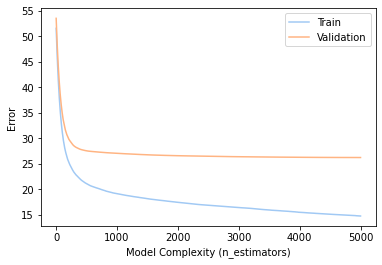

In [81]:
results = boosting.evals_result()
train_error = results['validation_0']["rmse"]
val_error = results['validation_1']["rmse"]


plt.plot(train_error, label='Train')
plt.plot(val_error, label='Validation')
plt.ylabel('Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend();

#### 3-2) boosting hyperparameter model 훈련과정

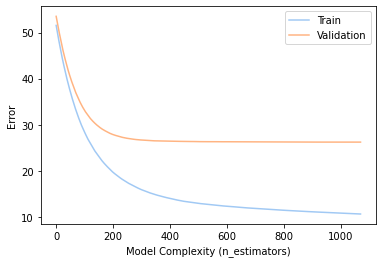

In [84]:
results = model2.evals_result()
train_error = results['validation_0']["rmse"]
val_error = results['validation_1']["rmse"]


plt.plot(train_error, label='Train')
plt.plot(val_error, label='Validation')
plt.ylabel('Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend();

In [ ]:
%matplotlib inline
import seaborn as sns
sns.displot(df1[target], kde=True);

In [ ]:
#pip install shap==0.29.3

**3-3) 개별적인 데이터 확인**

In [85]:
row = X_test.iloc[[2]] 
row

,points,winery_y,variety_y,designation_y,province_y,region_y,country_y
121242,94,0.003085,18.044669,0.000134,59.881773,0.945478,868.404762


In [87]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [88]:
variety_count[ (variety_count["variety"] < 18.05) & (variety_count["variety"] >  18.03) ]

,variety
pinot noir,18.044669


pinot noir이 영향을 주는 것으로 관측된다.

In [89]:
country_count[ (country_count["country"] < 868.5)&(country_count["country"] >868.3) ]

,country
us,868.404762


US는 와인 제작 시, 숙성 기간에 대한 별도의 법적 규정이 없어서 저품질, 고평가된 와인이 다시 있는 것으로 추측된다.

**3-4) 개별데이터 확인**

In [99]:
row = X_test.iloc[[200]] 
row

,points,winery_y,variety_y,designation_y,province_y,region_y,country_y
67290,89,0.000853,3.907781,0.000053,59.881773,1.507377,868.404762


In [100]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [91]:
designation_count[ (designation_count["designation"] < 0.00005349) & (designation_count["designation"] > 0.00005347) ].shape

(7383, 1)

In [92]:
designation_count[ (designation_count["designation"] < 0.00005349) & (designation_count["designation"] > 0.00005347) ].head(5)

,designation
toscoforte,0.000053
cuvée le bec,0.000053
los cantos,0.000053
la traversagna,0.000053
merlot-cabernet sauvignon,0.000053


designation는 0.00005348과 0.00005347 사이에 7383개의 dwsingation이 존재한다. 그중 top 5개만 위와 같이 살펴보았다.

In [93]:
province_count[ (province_count["province"] < 59.89) & (province_count["province"] >  59.87) ]

,province
california,59.881773


In [94]:
variety_count[ (variety_count["variety"] < 3.909) & (variety_count["variety"] >  3.907) ]

,variety
zinfandel,3.907781


In [95]:
winery_count[ (winery_count["winery"] < 0.0008533) & (winery_count["winery"] >  0.0008531)].shape

(215, 1)

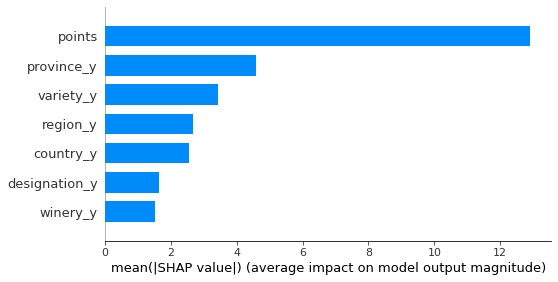

* point가 가장 높은 영향을 주는 feature 결과가 나왔으니 각각의 feature과 point의 관계 정도는 살펴볼 필요가 있다고 생각한다. 

1. point와 country의 관계 
* country=330.2는 이테리를 지칭함 
* 확실히 법적으로 와인의 숙성을 규정화하다보니 품질이 좋은 와인이 많이 생성되는것 같다. 

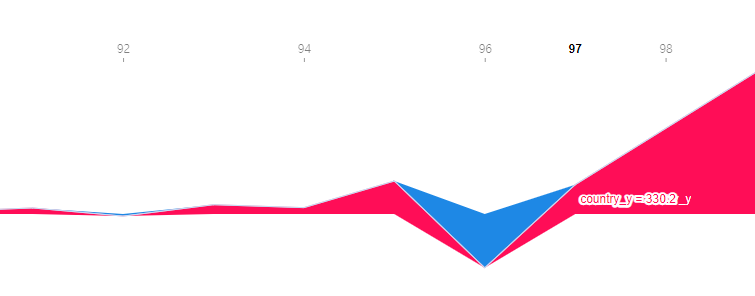

2. point와 province의 관계
* point와 province는 뚜렷한 상관관계가 관찰됨

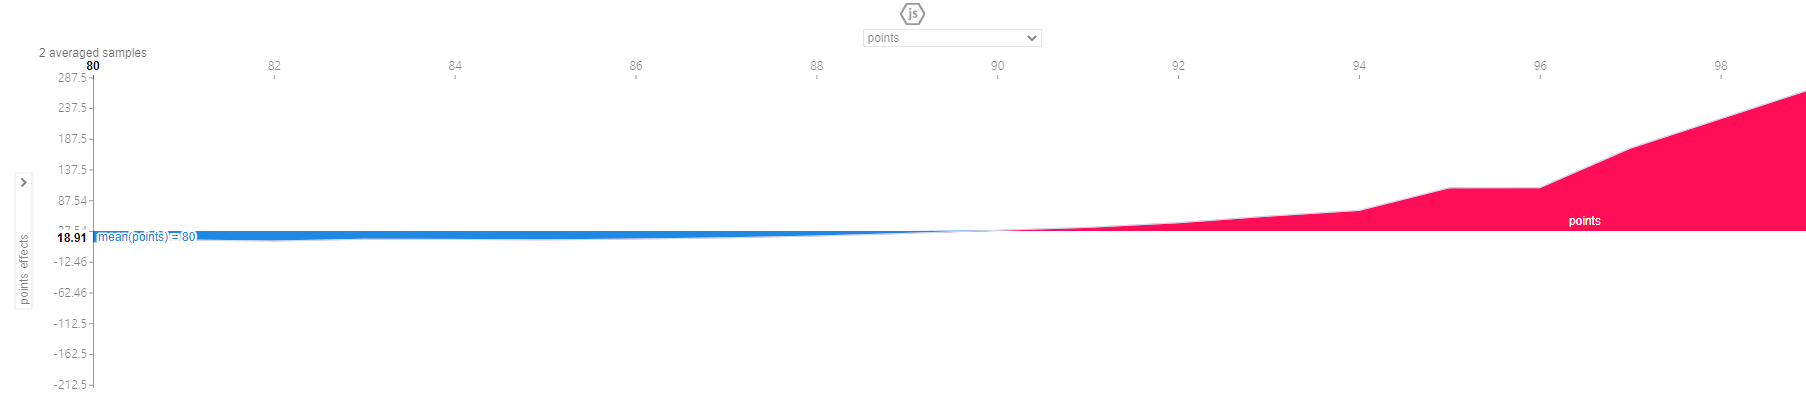

3. point와 region(포도생산지역)의 관계
* 포도가 생성되는 region feature는 어디서 생산되는지에 따라서  
point의 편차가 발생된다.  

* 이는 포도가 생성되는 지역의 건조함, 강수량, 풍향 등이 포도의 단맛을  
결정하기 때문으로 추측된다. 

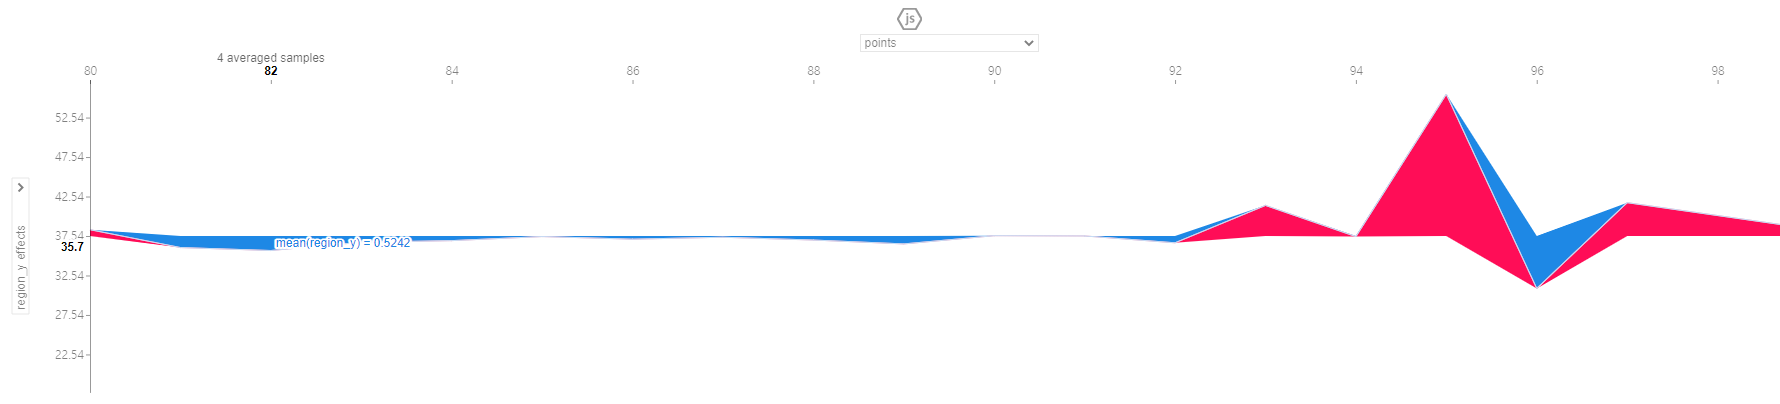

4. point와 variety의 관계
* 다양성은 40번이 초과되는 조합부터 급격하게 증가하는 것을 관찰할 수 있다.  
* 40번 초과되는 variety는 694개가 넘으며 그중 top20을 아래표로 기재하였다. 

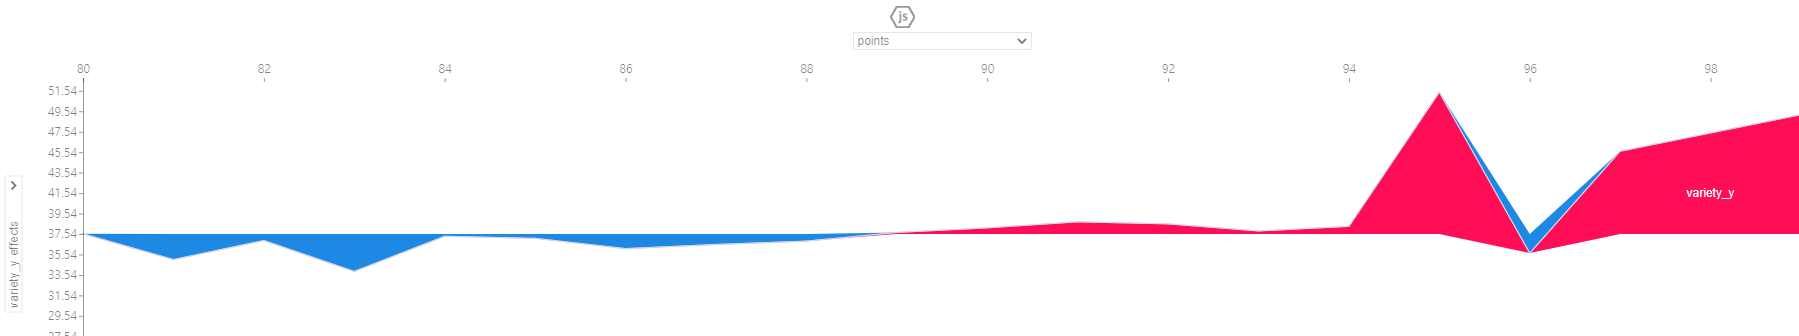

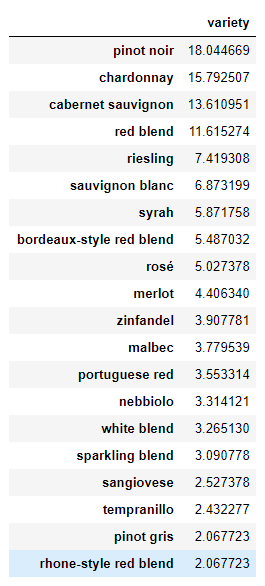

데이터 양이 너무 많아서 로컬에서는 돌려지지 않고7시간 넘게 돌려도 완성되지 않았으며, 코랩에서 300개만 놓고 돌렸을 때 추출된 시각화로 위와 같이 분석을 진행해보았습니다. 해당 코드는 작성은 하였지만, 실행되는데 너무 오래 걸려서 아래쪽으로 빼두었습니다. 이상입니다. 감사합니다. 


In [96]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

shap_values = explainer.shap_values(X_test.iloc[:300])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:300])



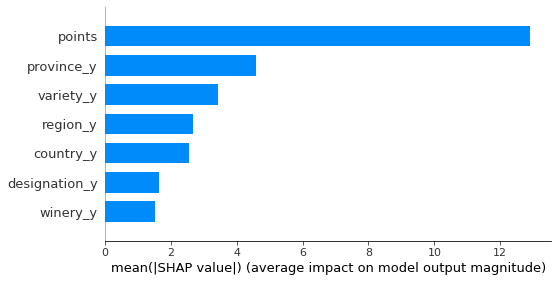

In [97]:
shap.summary_plot(shap_values, X_train.iloc[:], plot_type="bar")

In [98]:
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test)

# shap.initjs()
# shap.force_plot(
#     base_value=explainer.expected_value, 
#     shap_values=shap_values,
#     features=row
# )